In [1]:
import torch
from torch.autograd import Variable
import torchvision.datasets as dataset
import torchvision.transforms as transforms
from adastab1 import AdaStab
from OurAdam import Adam
import matplotlib.pyplot as plt
import numpy as np
import scipy.io as sio

In [2]:
torch.cuda.is_available()

True

In [3]:
root = './data'
download = True

In [4]:
batch_size = 128

In [5]:
trans = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.1307,), (0.3081,))])
train_set = dataset.MNIST(root=root, train=True, transform=trans, download=download)
train_loader = torch.utils.data.DataLoader(
                 dataset=train_set,
                 batch_size=batch_size,
                 shuffle=True)

print('==>>> total trainning batch number: {}'.format(len(train_loader)))
testset = dataset.MNIST(root=root, train=False, download=True, transform=trans)
test_loader = torch.utils.data.DataLoader(testset, batch_size=100,
                                         shuffle=False)

print('==>>> total trainning batch number: {}'.format(len(test_loader)))




==>>> total trainning batch number: 469
==>>> total trainning batch number: 100


In [6]:
max_epoch = 10
D_in, H, D_out = 784, 100, 10
criterion = torch.nn.CrossEntropyLoss()

In [7]:
def test():
        correct = 0
        total = torch.FloatTensor([0])
#     with torch.no_grad():
        test_loss = 0
        
        for batch_idx, (inputs, targets) in enumerate(test_loader):
            inputs = inputs.view(-1, 784)
            inputs, targets = Variable(inputs, volatile=True),Variable(targets, volatile=True)
            inputs, targets = inputs.cuda(), targets.cuda()
            outputs = model(inputs)
            loss = criterion(outputs, targets)
            test_loss += loss
            
            _, predicted = outputs.max(1)
            total += targets.size(0)
            correct += (predicted==targets).sum()
            
        print('test loss:{}'.format(test_loss/(batch_idx+1)))
        correct = correct.data[0]
        acc = correct/total
        print('Accuracy of the network on the 10000 test images: %f' % (
         acc))
        
        return test_loss/(batch_idx+1), acc

In [8]:
def one_layer():
    LOSS = np.zeros(shape=[1, max_epoch])
    Test_LOSS = np.zeros(shape=[1, max_epoch])
    TEST_Acc = np.zeros(shape=[1, max_epoch])
    for epoch in range(max_epoch):
        running_loss = 0
        for batch_idx, (x, y) in enumerate(train_loader):
            x = x.view(-1, 784)
            x, y = Variable(x), Variable(y)
            x, y = x.cuda(), y.cuda()
            y_pred = model(x)
            loss = criterion(y_pred, y)
            running_loss += loss
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
            
        print('==>>> epoch: {},train loss:{}'.format(epoch, running_loss/(batch_idx+1)))
        LOSS[0, epoch] = running_loss/(batch_idx+1)
        Test_LOSS[0, epoch], TEST_Acc[0, epoch] = test()
#   denominator = optimizer.denominator()
#         sio.savemat('./adam_denom_epoch{}'.format(epoch), {'Denom': denominator})
    print('Fininshed Training')
    
    return LOSS, Test_LOSS, TEST_Acc

In [28]:
model = torch.nn.Sequential(
    torch.nn.Linear(D_in, H),
    torch.nn.ReLU(),
    torch.nn.Linear(H, D_out),
)
model = model.cuda()
learning_rate = 1e-3
optimizer = Adam(model.parameters(), lr=learning_rate, weight_decay=0.1, amsgrad=False)
LOSS, Test_LOSS, Test_Acc = one_layer()

==>>> epoch: 0,train loss:Variable containing:
 0.5339
[torch.cuda.FloatTensor of size 1 (GPU 0)]

test loss:Variable containing:
 0.4629
[torch.cuda.FloatTensor of size 1 (GPU 0)]

Accuracy of the network on the 10000 test images: 0.016800
==>>> epoch: 1,train loss:Variable containing:
 0.4765
[torch.cuda.FloatTensor of size 1 (GPU 0)]

test loss:Variable containing:
 0.4752
[torch.cuda.FloatTensor of size 1 (GPU 0)]

Accuracy of the network on the 10000 test images: 0.016100
==>>> epoch: 2,train loss:Variable containing:
 0.4721
[torch.cuda.FloatTensor of size 1 (GPU 0)]

test loss:Variable containing:
 0.4532
[torch.cuda.FloatTensor of size 1 (GPU 0)]

Accuracy of the network on the 10000 test images: 0.013600
==>>> epoch: 3,train loss:Variable containing:
 0.4677
[torch.cuda.FloatTensor of size 1 (GPU 0)]

test loss:Variable containing:
 0.4488
[torch.cuda.FloatTensor of size 1 (GPU 0)]

Accuracy of the network on the 10000 test images: 0.000900
==>>> epoch: 4,train loss:Variable c

In [29]:
max_epoch=50

In [30]:
model = torch.nn.Sequential(
    torch.nn.Linear(D_in, H),
    torch.nn.ReLU(),
    torch.nn.Linear(H, D_out),
)
model = model.cuda()
learning_rate = 1e-3
optimizer = Adam(model.parameters(), lr=learning_rate, weight_decay=0.1, amsgrad=False)
LOSS, Test_LOSS, Test_Acc = one_layer()

==>>> epoch: 0,train loss:Variable containing:
 0.5478
[torch.cuda.FloatTensor of size 1 (GPU 0)]

test loss:Variable containing:
 0.4675
[torch.cuda.FloatTensor of size 1 (GPU 0)]

Accuracy of the network on the 10000 test images: 0.016600
==>>> epoch: 1,train loss:Variable containing:
 0.4792
[torch.cuda.FloatTensor of size 1 (GPU 0)]

test loss:Variable containing:
 0.4455
[torch.cuda.FloatTensor of size 1 (GPU 0)]

Accuracy of the network on the 10000 test images: 0.002000
==>>> epoch: 2,train loss:Variable containing:
 0.4722
[torch.cuda.FloatTensor of size 1 (GPU 0)]

test loss:Variable containing:
 0.4404
[torch.cuda.FloatTensor of size 1 (GPU 0)]

Accuracy of the network on the 10000 test images: 0.003600
==>>> epoch: 3,train loss:Variable containing:
 0.4692
[torch.cuda.FloatTensor of size 1 (GPU 0)]

test loss:Variable containing:
 0.4451
[torch.cuda.FloatTensor of size 1 (GPU 0)]

Accuracy of the network on the 10000 test images: 0.000400
==>>> epoch: 4,train loss:Variable c

KeyboardInterrupt: 

model = torch.nn.Sequential(
    torch.nn.Linear(D_in, H),
    torch.nn.ReLU(),
    torch.nn.Linear(H, D_out),
)
model = model.cuda()
learning_rate = 5e-4
optimizer = Adam(model.parameters(), lr=learning_rate, weight_decay=0.1, amsgrad=False)
LOSS, Test_LOSS, Test_Acc = one_layer()

In [32]:
model = torch.nn.Sequential(
    torch.nn.Linear(D_in, H),
    torch.nn.ReLU(),
    torch.nn.Linear(H, D_out),
)
model = model.cuda()
learning_rate = 1e-3
optimizer = Adam(model.parameters(), lr=learning_rate, weight_decay=0.2, amsgrad=False)
LOSS, Test_LOSS, Test_Acc = one_layer()

==>>> epoch: 0,train loss:Variable containing:
 0.7085
[torch.cuda.FloatTensor of size 1 (GPU 0)]

test loss:Variable containing:
 0.6382
[torch.cuda.FloatTensor of size 1 (GPU 0)]

Accuracy of the network on the 10000 test images: 0.002700
==>>> epoch: 1,train loss:Variable containing:
 0.6579
[torch.cuda.FloatTensor of size 1 (GPU 0)]

test loss:Variable containing:
 0.6416
[torch.cuda.FloatTensor of size 1 (GPU 0)]

Accuracy of the network on the 10000 test images: 0.016900
==>>> epoch: 2,train loss:Variable containing:
 0.6518
[torch.cuda.FloatTensor of size 1 (GPU 0)]

test loss:Variable containing:
 0.6264
[torch.cuda.FloatTensor of size 1 (GPU 0)]

Accuracy of the network on the 10000 test images: 0.001900
==>>> epoch: 3,train loss:Variable containing:
 0.6500
[torch.cuda.FloatTensor of size 1 (GPU 0)]

test loss:Variable containing:
 0.6355
[torch.cuda.FloatTensor of size 1 (GPU 0)]

Accuracy of the network on the 10000 test images: 0.011500
==>>> epoch: 4,train loss:Variable c

==>>> epoch: 34,train loss:Variable containing:
 0.6376
[torch.cuda.FloatTensor of size 1 (GPU 0)]

test loss:Variable containing:
 0.6175
[torch.cuda.FloatTensor of size 1 (GPU 0)]

Accuracy of the network on the 10000 test images: 0.015100
==>>> epoch: 35,train loss:Variable containing:
 0.6380
[torch.cuda.FloatTensor of size 1 (GPU 0)]

test loss:Variable containing:
 0.6202
[torch.cuda.FloatTensor of size 1 (GPU 0)]

Accuracy of the network on the 10000 test images: 0.010600
==>>> epoch: 36,train loss:Variable containing:
 0.6383
[torch.cuda.FloatTensor of size 1 (GPU 0)]

test loss:Variable containing:
 0.6077
[torch.cuda.FloatTensor of size 1 (GPU 0)]

Accuracy of the network on the 10000 test images: 0.011100
==>>> epoch: 37,train loss:Variable containing:
 0.6386
[torch.cuda.FloatTensor of size 1 (GPU 0)]

test loss:Variable containing:
 0.6167
[torch.cuda.FloatTensor of size 1 (GPU 0)]

Accuracy of the network on the 10000 test images: 0.005300
==>>> epoch: 38,train loss:Varia

In [33]:
model = torch.nn.Sequential(
    torch.nn.Linear(D_in, H),
    torch.nn.ReLU(),
    torch.nn.Linear(H, D_out),
)
model = model.cuda()
learning_rate = 2e-3
optimizer = Adam(model.parameters(), lr=learning_rate, weight_decay=0.1, amsgrad=False)
LOSS, Test_LOSS, Test_Acc = one_layer()

==>>> epoch: 0,train loss:Variable containing:
 0.5321
[torch.cuda.FloatTensor of size 1 (GPU 0)]

test loss:Variable containing:
 0.4700
[torch.cuda.FloatTensor of size 1 (GPU 0)]

Accuracy of the network on the 10000 test images: 0.010900
==>>> epoch: 1,train loss:Variable containing:
 0.4869
[torch.cuda.FloatTensor of size 1 (GPU 0)]

test loss:Variable containing:
 0.4759
[torch.cuda.FloatTensor of size 1 (GPU 0)]

Accuracy of the network on the 10000 test images: 0.011900
==>>> epoch: 2,train loss:Variable containing:
 0.4814
[torch.cuda.FloatTensor of size 1 (GPU 0)]

test loss:Variable containing:
 0.4414
[torch.cuda.FloatTensor of size 1 (GPU 0)]

Accuracy of the network on the 10000 test images: 0.022100
==>>> epoch: 3,train loss:Variable containing:
 0.4771
[torch.cuda.FloatTensor of size 1 (GPU 0)]

test loss:Variable containing:
 0.4653
[torch.cuda.FloatTensor of size 1 (GPU 0)]

Accuracy of the network on the 10000 test images: 0.017400
==>>> epoch: 4,train loss:Variable c

==>>> epoch: 34,train loss:Variable containing:
 0.4634
[torch.cuda.FloatTensor of size 1 (GPU 0)]

test loss:Variable containing:
 0.4386
[torch.cuda.FloatTensor of size 1 (GPU 0)]

Accuracy of the network on the 10000 test images: 0.003300
==>>> epoch: 35,train loss:Variable containing:
 0.4626
[torch.cuda.FloatTensor of size 1 (GPU 0)]

test loss:Variable containing:
 0.4422
[torch.cuda.FloatTensor of size 1 (GPU 0)]

Accuracy of the network on the 10000 test images: 0.021700
==>>> epoch: 36,train loss:Variable containing:
 0.4629
[torch.cuda.FloatTensor of size 1 (GPU 0)]

test loss:Variable containing:
 0.4472
[torch.cuda.FloatTensor of size 1 (GPU 0)]

Accuracy of the network on the 10000 test images: 0.025500
==>>> epoch: 37,train loss:Variable containing:
 0.4640
[torch.cuda.FloatTensor of size 1 (GPU 0)]

test loss:Variable containing:
 0.4369
[torch.cuda.FloatTensor of size 1 (GPU 0)]

Accuracy of the network on the 10000 test images: 0.005200
==>>> epoch: 38,train loss:Varia

In [34]:
model = torch.nn.Sequential(
    torch.nn.Linear(D_in, H),
    torch.nn.ReLU(),
    torch.nn.Linear(H, D_out),
)
model = model.cuda()
learning_rate = 2e-3
optimizer = Adam(model.parameters(), lr=learning_rate, weight_decay=0.1, amsgrad=True)
LOSS, Test_LOSS, Test_Acc = one_layer()

==>>> epoch: 0,train loss:Variable containing:
 0.5334
[torch.cuda.FloatTensor of size 1 (GPU 0)]

test loss:Variable containing:
 0.4700
[torch.cuda.FloatTensor of size 1 (GPU 0)]

Accuracy of the network on the 10000 test images: 0.013000
==>>> epoch: 1,train loss:Variable containing:
 0.4914
[torch.cuda.FloatTensor of size 1 (GPU 0)]

test loss:Variable containing:
 0.4624
[torch.cuda.FloatTensor of size 1 (GPU 0)]

Accuracy of the network on the 10000 test images: 0.017100
==>>> epoch: 2,train loss:Variable containing:
 0.4807
[torch.cuda.FloatTensor of size 1 (GPU 0)]

test loss:Variable containing:
 0.4616
[torch.cuda.FloatTensor of size 1 (GPU 0)]

Accuracy of the network on the 10000 test images: 0.016800
==>>> epoch: 3,train loss:Variable containing:
 0.4786
[torch.cuda.FloatTensor of size 1 (GPU 0)]

test loss:Variable containing:
 0.4520
[torch.cuda.FloatTensor of size 1 (GPU 0)]

Accuracy of the network on the 10000 test images: 0.000300
==>>> epoch: 4,train loss:Variable c

==>>> epoch: 34,train loss:Variable containing:
 0.4658
[torch.cuda.FloatTensor of size 1 (GPU 0)]

test loss:Variable containing:
 0.4561
[torch.cuda.FloatTensor of size 1 (GPU 0)]

Accuracy of the network on the 10000 test images: 0.021300
==>>> epoch: 35,train loss:Variable containing:
 0.4670
[torch.cuda.FloatTensor of size 1 (GPU 0)]

test loss:Variable containing:
 0.4392
[torch.cuda.FloatTensor of size 1 (GPU 0)]

Accuracy of the network on the 10000 test images: 0.001900
==>>> epoch: 36,train loss:Variable containing:
 0.4651
[torch.cuda.FloatTensor of size 1 (GPU 0)]

test loss:Variable containing:
 0.4394
[torch.cuda.FloatTensor of size 1 (GPU 0)]

Accuracy of the network on the 10000 test images: 0.002800
==>>> epoch: 37,train loss:Variable containing:
 0.4636
[torch.cuda.FloatTensor of size 1 (GPU 0)]

test loss:Variable containing:
 0.4407
[torch.cuda.FloatTensor of size 1 (GPU 0)]

Accuracy of the network on the 10000 test images: 0.006700
==>>> epoch: 38,train loss:Varia

In [37]:
model = torch.nn.Sequential(
    torch.nn.Linear(D_in, H),
    torch.nn.ReLU(),
    torch.nn.Linear(H, D_out),
)
model = model.cuda()
learning_rate = 2e-3
optimizer = Adam(model.parameters(), lr=learning_rate, weight_decay=0.01, amsgrad=True)
LOSS, Test_LOSS, Test_Acc = one_layer()

==>>> epoch: 0,train loss:Variable containing:
 0.3016
[torch.cuda.FloatTensor of size 1 (GPU 0)]

test loss:Variable containing:
 0.2067
[torch.cuda.FloatTensor of size 1 (GPU 0)]

Accuracy of the network on the 10000 test images: 0.017700
==>>> epoch: 1,train loss:Variable containing:
 0.1998
[torch.cuda.FloatTensor of size 1 (GPU 0)]

test loss:Variable containing:
 0.2058
[torch.cuda.FloatTensor of size 1 (GPU 0)]

Accuracy of the network on the 10000 test images: 0.015800
==>>> epoch: 2,train loss:Variable containing:
 0.1858
[torch.cuda.FloatTensor of size 1 (GPU 0)]

test loss:Variable containing:
 0.1719
[torch.cuda.FloatTensor of size 1 (GPU 0)]

Accuracy of the network on the 10000 test images: 0.003100
==>>> epoch: 3,train loss:Variable containing:
 0.1791
[torch.cuda.FloatTensor of size 1 (GPU 0)]

test loss:Variable containing:
 0.1638
[torch.cuda.FloatTensor of size 1 (GPU 0)]

Accuracy of the network on the 10000 test images: 0.008600
==>>> epoch: 4,train loss:Variable c

==>>> epoch: 34,train loss:Variable containing:
 0.1622
[torch.cuda.FloatTensor of size 1 (GPU 0)]

test loss:Variable containing:
 0.1584
[torch.cuda.FloatTensor of size 1 (GPU 0)]

Accuracy of the network on the 10000 test images: 0.011700
==>>> epoch: 35,train loss:Variable containing:
 0.1626
[torch.cuda.FloatTensor of size 1 (GPU 0)]

test loss:Variable containing:
 0.1571
[torch.cuda.FloatTensor of size 1 (GPU 0)]

Accuracy of the network on the 10000 test images: 0.009300
==>>> epoch: 36,train loss:Variable containing:
 0.1613
[torch.cuda.FloatTensor of size 1 (GPU 0)]

test loss:Variable containing:
 0.1416
[torch.cuda.FloatTensor of size 1 (GPU 0)]

Accuracy of the network on the 10000 test images: 0.014200
==>>> epoch: 37,train loss:Variable containing:
 0.1626
[torch.cuda.FloatTensor of size 1 (GPU 0)]

test loss:Variable containing:
 0.1521
[torch.cuda.FloatTensor of size 1 (GPU 0)]

Accuracy of the network on the 10000 test images: 0.011500
==>>> epoch: 38,train loss:Varia

In [38]:
sio.savemat('amsgrad_onelayer_gen.mat',{'loss':LOSS, 'test_loss':Test_LOSS, 'test_acc':Test_Acc})

In [42]:
model = torch.nn.Sequential(
    torch.nn.Linear(D_in, H),
    torch.nn.ReLU(),
    torch.nn.Linear(H, D_out),
)
model = model.cuda()
learning_rate = 2e-3
optimizer = AdaStab(model.parameters(), lr=learning_rate, weight_decay=0.01, gamma=0.1)
LOSS, Test_LOSS, Test_Acc = one_layer()

==>>> epoch: 0,train loss:Variable containing:
 0.2993
[torch.cuda.FloatTensor of size 1 (GPU 0)]

test loss:Variable containing:
 0.2026
[torch.cuda.FloatTensor of size 1 (GPU 0)]

Accuracy of the network on the 10000 test images: 0.021800
==>>> epoch: 1,train loss:Variable containing:
 0.2001
[torch.cuda.FloatTensor of size 1 (GPU 0)]

test loss:Variable containing:
 0.1839
[torch.cuda.FloatTensor of size 1 (GPU 0)]

Accuracy of the network on the 10000 test images: 0.000900
==>>> epoch: 2,train loss:Variable containing:
 0.1854
[torch.cuda.FloatTensor of size 1 (GPU 0)]

test loss:Variable containing:
 0.1618
[torch.cuda.FloatTensor of size 1 (GPU 0)]

Accuracy of the network on the 10000 test images: 0.007600
==>>> epoch: 3,train loss:Variable containing:
 0.1780
[torch.cuda.FloatTensor of size 1 (GPU 0)]

test loss:Variable containing:
 0.1521
[torch.cuda.FloatTensor of size 1 (GPU 0)]

Accuracy of the network on the 10000 test images: 0.012500
==>>> epoch: 4,train loss:Variable c

==>>> epoch: 34,train loss:Variable containing:
 0.1660
[torch.cuda.FloatTensor of size 1 (GPU 0)]

test loss:Variable containing:
 0.1555
[torch.cuda.FloatTensor of size 1 (GPU 0)]

Accuracy of the network on the 10000 test images: 0.009400
==>>> epoch: 35,train loss:Variable containing:
 0.1646
[torch.cuda.FloatTensor of size 1 (GPU 0)]

test loss:Variable containing:
 0.1726
[torch.cuda.FloatTensor of size 1 (GPU 0)]

Accuracy of the network on the 10000 test images: 0.001700
==>>> epoch: 36,train loss:Variable containing:
 0.1666
[torch.cuda.FloatTensor of size 1 (GPU 0)]

test loss:Variable containing:
 0.1616
[torch.cuda.FloatTensor of size 1 (GPU 0)]

Accuracy of the network on the 10000 test images: 0.009100
==>>> epoch: 37,train loss:Variable containing:
 0.1662
[torch.cuda.FloatTensor of size 1 (GPU 0)]

test loss:Variable containing:
 0.1604
[torch.cuda.FloatTensor of size 1 (GPU 0)]

Accuracy of the network on the 10000 test images: 0.007900
==>>> epoch: 38,train loss:Varia

In [52]:
sio.savemat('nosadam_onelayer_gen.mat',{'loss':LOSS, 'test_loss':Test_LOSS, 'test_acc':Test_Acc})

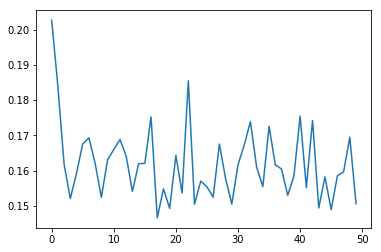

In [51]:
idx = [i for i in range(50)]
Test_LOSS=np.squeeze(Test_LOSS)
plt.plot(idx, Test_LOSS)

In [9]:
max_epoch = 100

In [55]:
# model = torch.nn.Sequential(
#     torch.nn.Linear(D_in, H),
#     torch.nn.ReLU(),
#     torch.nn.Linear(H, D_out),
# )
# model = model.cuda()
# learning_rate = 3e-3
# optimizer = Adam(model.parameters(), lr=learning_rate, weight_decay=0.01, amsgrad=True)
# LOSS, Test_LOSS, Test_Acc = one_layer()

==>>> epoch: 0,train loss:Variable containing:
 0.2909
[torch.cuda.FloatTensor of size 1 (GPU 0)]

test loss:Variable containing:
 0.2051
[torch.cuda.FloatTensor of size 1 (GPU 0)]

Accuracy of the network on the 10000 test images: 0.018300
==>>> epoch: 1,train loss:Variable containing:
 0.2071
[torch.cuda.FloatTensor of size 1 (GPU 0)]

test loss:Variable containing:
 0.1912
[torch.cuda.FloatTensor of size 1 (GPU 0)]

Accuracy of the network on the 10000 test images: 0.023600
==>>> epoch: 2,train loss:Variable containing:
 0.1963
[torch.cuda.FloatTensor of size 1 (GPU 0)]

test loss:Variable containing:
 0.1853
[torch.cuda.FloatTensor of size 1 (GPU 0)]

Accuracy of the network on the 10000 test images: 0.023600
==>>> epoch: 3,train loss:Variable containing:
 0.1897
[torch.cuda.FloatTensor of size 1 (GPU 0)]

test loss:Variable containing:
 0.2033
[torch.cuda.FloatTensor of size 1 (GPU 0)]

Accuracy of the network on the 10000 test images: 0.015100
==>>> epoch: 4,train loss:Variable c

==>>> epoch: 34,train loss:Variable containing:
 0.1772
[torch.cuda.FloatTensor of size 1 (GPU 0)]

test loss:Variable containing:
 0.1629
[torch.cuda.FloatTensor of size 1 (GPU 0)]

Accuracy of the network on the 10000 test images: 0.009100
==>>> epoch: 35,train loss:Variable containing:
 0.1749
[torch.cuda.FloatTensor of size 1 (GPU 0)]

test loss:Variable containing:
 0.1500
[torch.cuda.FloatTensor of size 1 (GPU 0)]

Accuracy of the network on the 10000 test images: 0.012800
==>>> epoch: 36,train loss:Variable containing:
 0.1760
[torch.cuda.FloatTensor of size 1 (GPU 0)]

test loss:Variable containing:
 0.1669
[torch.cuda.FloatTensor of size 1 (GPU 0)]

Accuracy of the network on the 10000 test images: 0.006200
==>>> epoch: 37,train loss:Variable containing:
 0.1745
[torch.cuda.FloatTensor of size 1 (GPU 0)]

test loss:Variable containing:
 0.1663
[torch.cuda.FloatTensor of size 1 (GPU 0)]

Accuracy of the network on the 10000 test images: 0.005800
==>>> epoch: 38,train loss:Varia

==>>> epoch: 68,train loss:Variable containing:
 0.1725
[torch.cuda.FloatTensor of size 1 (GPU 0)]

test loss:Variable containing:
 0.1519
[torch.cuda.FloatTensor of size 1 (GPU 0)]

Accuracy of the network on the 10000 test images: 0.014500
==>>> epoch: 69,train loss:Variable containing:
 0.1752
[torch.cuda.FloatTensor of size 1 (GPU 0)]

test loss:Variable containing:
 0.1684
[torch.cuda.FloatTensor of size 1 (GPU 0)]

Accuracy of the network on the 10000 test images: 0.005600
==>>> epoch: 70,train loss:Variable containing:
 0.1737
[torch.cuda.FloatTensor of size 1 (GPU 0)]

test loss:Variable containing:
 0.1599
[torch.cuda.FloatTensor of size 1 (GPU 0)]

Accuracy of the network on the 10000 test images: 0.009400
==>>> epoch: 71,train loss:Variable containing:
 0.1759
[torch.cuda.FloatTensor of size 1 (GPU 0)]

test loss:Variable containing:
 0.1644
[torch.cuda.FloatTensor of size 1 (GPU 0)]

Accuracy of the network on the 10000 test images: 0.006700
==>>> epoch: 72,train loss:Varia

In [56]:
model = torch.nn.Sequential(
    torch.nn.Linear(D_in, H),
    torch.nn.ReLU(),
    torch.nn.Linear(H, D_out),
)
model = model.cuda()
learning_rate = 1e-3
optimizer = Adam(model.parameters(), lr=learning_rate, weight_decay=0.01, amsgrad=True)
LOSS, Test_LOSS, Test_Acc = one_layer()

==>>> epoch: 0,train loss:Variable containing:
 0.3473
[torch.cuda.FloatTensor of size 1 (GPU 0)]

test loss:Variable containing:
 0.2194
[torch.cuda.FloatTensor of size 1 (GPU 0)]

Accuracy of the network on the 10000 test images: 0.019000
==>>> epoch: 1,train loss:Variable containing:
 0.2073
[torch.cuda.FloatTensor of size 1 (GPU 0)]

test loss:Variable containing:
 0.1852
[torch.cuda.FloatTensor of size 1 (GPU 0)]

Accuracy of the network on the 10000 test images: 0.005600
==>>> epoch: 2,train loss:Variable containing:
 0.1826
[torch.cuda.FloatTensor of size 1 (GPU 0)]

test loss:Variable containing:
 0.1666
[torch.cuda.FloatTensor of size 1 (GPU 0)]

Accuracy of the network on the 10000 test images: 0.011300
==>>> epoch: 3,train loss:Variable containing:
 0.1710
[torch.cuda.FloatTensor of size 1 (GPU 0)]

test loss:Variable containing:
 0.1586
[torch.cuda.FloatTensor of size 1 (GPU 0)]

Accuracy of the network on the 10000 test images: 0.009000
==>>> epoch: 4,train loss:Variable c

==>>> epoch: 34,train loss:Variable containing:
 0.1458
[torch.cuda.FloatTensor of size 1 (GPU 0)]

test loss:Variable containing:
 0.1429
[torch.cuda.FloatTensor of size 1 (GPU 0)]

Accuracy of the network on the 10000 test images: 0.014900
==>>> epoch: 35,train loss:Variable containing:
 0.1462
[torch.cuda.FloatTensor of size 1 (GPU 0)]

test loss:Variable containing:
 0.1430
[torch.cuda.FloatTensor of size 1 (GPU 0)]

Accuracy of the network on the 10000 test images: 0.015600
==>>> epoch: 36,train loss:Variable containing:
 0.1469
[torch.cuda.FloatTensor of size 1 (GPU 0)]

test loss:Variable containing:
 0.1393
[torch.cuda.FloatTensor of size 1 (GPU 0)]

Accuracy of the network on the 10000 test images: 0.015900
==>>> epoch: 37,train loss:Variable containing:
 0.1465
[torch.cuda.FloatTensor of size 1 (GPU 0)]

test loss:Variable containing:
 0.1370
[torch.cuda.FloatTensor of size 1 (GPU 0)]

Accuracy of the network on the 10000 test images: 0.016500
==>>> epoch: 38,train loss:Varia

==>>> epoch: 68,train loss:Variable containing:
 0.1462
[torch.cuda.FloatTensor of size 1 (GPU 0)]

test loss:Variable containing:
 0.1418
[torch.cuda.FloatTensor of size 1 (GPU 0)]

Accuracy of the network on the 10000 test images: 0.016000
==>>> epoch: 69,train loss:Variable containing:
 0.1460
[torch.cuda.FloatTensor of size 1 (GPU 0)]

test loss:Variable containing:
 0.1362
[torch.cuda.FloatTensor of size 1 (GPU 0)]

Accuracy of the network on the 10000 test images: 0.019600
==>>> epoch: 70,train loss:Variable containing:
 0.1468
[torch.cuda.FloatTensor of size 1 (GPU 0)]

test loss:Variable containing:
 0.1408
[torch.cuda.FloatTensor of size 1 (GPU 0)]

Accuracy of the network on the 10000 test images: 0.015700
==>>> epoch: 71,train loss:Variable containing:
 0.1456
[torch.cuda.FloatTensor of size 1 (GPU 0)]

test loss:Variable containing:
 0.1375
[torch.cuda.FloatTensor of size 1 (GPU 0)]

Accuracy of the network on the 10000 test images: 0.018900
==>>> epoch: 72,train loss:Varia

In [57]:
sio.savemat('amsgrad_onelayer_gen.mat',{'loss':LOSS, 'test_loss':Test_LOSS, 'test_acc':Test_Acc})

In [58]:
model = torch.nn.Sequential(
    torch.nn.Linear(D_in, H),
    torch.nn.ReLU(),
    torch.nn.Linear(H, D_out),
)
model = model.cuda()
learning_rate = 8e-4
optimizer = Adam(model.parameters(), lr=learning_rate, weight_decay=0.01, amsgrad=True)
LOSS, Test_LOSS, Test_Acc = one_layer()

==>>> epoch: 0,train loss:Variable containing:
 0.3662
[torch.cuda.FloatTensor of size 1 (GPU 0)]

test loss:Variable containing:
 0.2219
[torch.cuda.FloatTensor of size 1 (GPU 0)]

Accuracy of the network on the 10000 test images: 0.018100
==>>> epoch: 1,train loss:Variable containing:
 0.2133
[torch.cuda.FloatTensor of size 1 (GPU 0)]

test loss:Variable containing:
 0.1841
[torch.cuda.FloatTensor of size 1 (GPU 0)]

Accuracy of the network on the 10000 test images: 0.001100
==>>> epoch: 2,train loss:Variable containing:
 0.1856
[torch.cuda.FloatTensor of size 1 (GPU 0)]

test loss:Variable containing:
 0.1681
[torch.cuda.FloatTensor of size 1 (GPU 0)]

Accuracy of the network on the 10000 test images: 0.006700
==>>> epoch: 3,train loss:Variable containing:
 0.1712
[torch.cuda.FloatTensor of size 1 (GPU 0)]

test loss:Variable containing:
 0.1614
[torch.cuda.FloatTensor of size 1 (GPU 0)]

Accuracy of the network on the 10000 test images: 0.011300
==>>> epoch: 4,train loss:Variable c

==>>> epoch: 34,train loss:Variable containing:
 0.1442
[torch.cuda.FloatTensor of size 1 (GPU 0)]

test loss:Variable containing:
 0.1356
[torch.cuda.FloatTensor of size 1 (GPU 0)]

Accuracy of the network on the 10000 test images: 0.017500
==>>> epoch: 35,train loss:Variable containing:
 0.1438
[torch.cuda.FloatTensor of size 1 (GPU 0)]

test loss:Variable containing:
 0.1402
[torch.cuda.FloatTensor of size 1 (GPU 0)]

Accuracy of the network on the 10000 test images: 0.017100
==>>> epoch: 36,train loss:Variable containing:
 0.1434
[torch.cuda.FloatTensor of size 1 (GPU 0)]

test loss:Variable containing:
 0.1384
[torch.cuda.FloatTensor of size 1 (GPU 0)]

Accuracy of the network on the 10000 test images: 0.017900
==>>> epoch: 37,train loss:Variable containing:
 0.1436
[torch.cuda.FloatTensor of size 1 (GPU 0)]

test loss:Variable containing:
 0.1412
[torch.cuda.FloatTensor of size 1 (GPU 0)]

Accuracy of the network on the 10000 test images: 0.016200
==>>> epoch: 38,train loss:Varia

==>>> epoch: 68,train loss:Variable containing:
 0.1426
[torch.cuda.FloatTensor of size 1 (GPU 0)]

test loss:Variable containing:
 0.1423
[torch.cuda.FloatTensor of size 1 (GPU 0)]

Accuracy of the network on the 10000 test images: 0.018000
==>>> epoch: 69,train loss:Variable containing:
 0.1424
[torch.cuda.FloatTensor of size 1 (GPU 0)]

test loss:Variable containing:
 0.1355
[torch.cuda.FloatTensor of size 1 (GPU 0)]

Accuracy of the network on the 10000 test images: 0.018000
==>>> epoch: 70,train loss:Variable containing:
 0.1430
[torch.cuda.FloatTensor of size 1 (GPU 0)]

test loss:Variable containing:
 0.1418
[torch.cuda.FloatTensor of size 1 (GPU 0)]

Accuracy of the network on the 10000 test images: 0.017500
==>>> epoch: 71,train loss:Variable containing:
 0.1424
[torch.cuda.FloatTensor of size 1 (GPU 0)]

test loss:Variable containing:
 0.1388
[torch.cuda.FloatTensor of size 1 (GPU 0)]

Accuracy of the network on the 10000 test images: 0.018000
==>>> epoch: 72,train loss:Varia

In [59]:
sio.savemat('amsgrad_onelayer_gen8.mat',{'loss':LOSS, 'test_loss':Test_LOSS, 'test_acc':Test_Acc})

In [60]:
# model = torch.nn.Sequential(
#     torch.nn.Linear(D_in, H),
#     torch.nn.ReLU(),
#     torch.nn.Linear(H, D_out),
# )
# model = model.cuda()
# learning_rate = 1e-3
# optimizer = AdaStab(model.parameters(), lr=learning_rate, weight_decay=0.01, gamma=0.1)
# LOSS, Test_LOSS, Test_Acc = one_layer()

==>>> epoch: 0,train loss:Variable containing:
 0.3491
[torch.cuda.FloatTensor of size 1 (GPU 0)]

test loss:Variable containing:
 0.2233
[torch.cuda.FloatTensor of size 1 (GPU 0)]

Accuracy of the network on the 10000 test images: 0.014900
==>>> epoch: 1,train loss:Variable containing:
 0.2080
[torch.cuda.FloatTensor of size 1 (GPU 0)]

test loss:Variable containing:
 0.1778
[torch.cuda.FloatTensor of size 1 (GPU 0)]

Accuracy of the network on the 10000 test images: 0.005800
==>>> epoch: 2,train loss:Variable containing:
 0.1814
[torch.cuda.FloatTensor of size 1 (GPU 0)]

test loss:Variable containing:
 0.1625
[torch.cuda.FloatTensor of size 1 (GPU 0)]

Accuracy of the network on the 10000 test images: 0.008400
==>>> epoch: 3,train loss:Variable containing:
 0.1711
[torch.cuda.FloatTensor of size 1 (GPU 0)]

test loss:Variable containing:
 0.1603
[torch.cuda.FloatTensor of size 1 (GPU 0)]

Accuracy of the network on the 10000 test images: 0.008300
==>>> epoch: 4,train loss:Variable c

==>>> epoch: 34,train loss:Variable containing:
 0.1501
[torch.cuda.FloatTensor of size 1 (GPU 0)]

test loss:Variable containing:
 0.1446
[torch.cuda.FloatTensor of size 1 (GPU 0)]

Accuracy of the network on the 10000 test images: 0.015600
==>>> epoch: 35,train loss:Variable containing:
 0.1499
[torch.cuda.FloatTensor of size 1 (GPU 0)]

test loss:Variable containing:
 0.1500
[torch.cuda.FloatTensor of size 1 (GPU 0)]

Accuracy of the network on the 10000 test images: 0.015000
==>>> epoch: 36,train loss:Variable containing:
 0.1491
[torch.cuda.FloatTensor of size 1 (GPU 0)]

test loss:Variable containing:
 0.1388
[torch.cuda.FloatTensor of size 1 (GPU 0)]

Accuracy of the network on the 10000 test images: 0.017400
==>>> epoch: 37,train loss:Variable containing:
 0.1499
[torch.cuda.FloatTensor of size 1 (GPU 0)]

test loss:Variable containing:
 0.1453
[torch.cuda.FloatTensor of size 1 (GPU 0)]

Accuracy of the network on the 10000 test images: 0.013800
==>>> epoch: 38,train loss:Varia

==>>> epoch: 68,train loss:Variable containing:
 0.1493
[torch.cuda.FloatTensor of size 1 (GPU 0)]

test loss:Variable containing:
 0.1359
[torch.cuda.FloatTensor of size 1 (GPU 0)]

Accuracy of the network on the 10000 test images: 0.018700
==>>> epoch: 69,train loss:Variable containing:
 0.1477
[torch.cuda.FloatTensor of size 1 (GPU 0)]

test loss:Variable containing:
 0.1382
[torch.cuda.FloatTensor of size 1 (GPU 0)]

Accuracy of the network on the 10000 test images: 0.018700
==>>> epoch: 70,train loss:Variable containing:
 0.1481
[torch.cuda.FloatTensor of size 1 (GPU 0)]

test loss:Variable containing:
 0.1525
[torch.cuda.FloatTensor of size 1 (GPU 0)]

Accuracy of the network on the 10000 test images: 0.014400
==>>> epoch: 71,train loss:Variable containing:
 0.1489
[torch.cuda.FloatTensor of size 1 (GPU 0)]

test loss:Variable containing:
 0.1365
[torch.cuda.FloatTensor of size 1 (GPU 0)]

Accuracy of the network on the 10000 test images: 0.017900
==>>> epoch: 72,train loss:Varia

In [61]:
sio.savemat('nosadam_onelayer_gen10.mat',{'loss':LOSS, 'test_loss':Test_LOSS, 'test_acc':Test_Acc})

In [62]:
model = torch.nn.Sequential(
    torch.nn.Linear(D_in, H),
    torch.nn.ReLU(),
    torch.nn.Linear(H, D_out),
)
model = model.cuda()
learning_rate = 8e-4
optimizer = AdaStab(model.parameters(), lr=learning_rate, weight_decay=0.01, gamma=0.1)
LOSS, Test_LOSS, Test_Acc = one_layer()

==>>> epoch: 0,train loss:Variable containing:
 0.3625
[torch.cuda.FloatTensor of size 1 (GPU 0)]

test loss:Variable containing:
 0.2257
[torch.cuda.FloatTensor of size 1 (GPU 0)]

Accuracy of the network on the 10000 test images: 0.016000
==>>> epoch: 1,train loss:Variable containing:
 0.2126
[torch.cuda.FloatTensor of size 1 (GPU 0)]

test loss:Variable containing:
 0.1845
[torch.cuda.FloatTensor of size 1 (GPU 0)]

Accuracy of the network on the 10000 test images: 0.003700
==>>> epoch: 2,train loss:Variable containing:
 0.1828
[torch.cuda.FloatTensor of size 1 (GPU 0)]

test loss:Variable containing:
 0.1658
[torch.cuda.FloatTensor of size 1 (GPU 0)]

Accuracy of the network on the 10000 test images: 0.006400
==>>> epoch: 3,train loss:Variable containing:
 0.1712
[torch.cuda.FloatTensor of size 1 (GPU 0)]

test loss:Variable containing:
 0.1613
[torch.cuda.FloatTensor of size 1 (GPU 0)]

Accuracy of the network on the 10000 test images: 0.011800
==>>> epoch: 4,train loss:Variable c

==>>> epoch: 34,train loss:Variable containing:
 0.1450
[torch.cuda.FloatTensor of size 1 (GPU 0)]

test loss:Variable containing:
 0.1381
[torch.cuda.FloatTensor of size 1 (GPU 0)]

Accuracy of the network on the 10000 test images: 0.018000
==>>> epoch: 35,train loss:Variable containing:
 0.1471
[torch.cuda.FloatTensor of size 1 (GPU 0)]

test loss:Variable containing:
 0.1377
[torch.cuda.FloatTensor of size 1 (GPU 0)]

Accuracy of the network on the 10000 test images: 0.017300
==>>> epoch: 36,train loss:Variable containing:
 0.1467
[torch.cuda.FloatTensor of size 1 (GPU 0)]

test loss:Variable containing:
 0.1388
[torch.cuda.FloatTensor of size 1 (GPU 0)]

Accuracy of the network on the 10000 test images: 0.016300
==>>> epoch: 37,train loss:Variable containing:
 0.1461
[torch.cuda.FloatTensor of size 1 (GPU 0)]

test loss:Variable containing:
 0.1398
[torch.cuda.FloatTensor of size 1 (GPU 0)]

Accuracy of the network on the 10000 test images: 0.016400
==>>> epoch: 38,train loss:Varia

==>>> epoch: 68,train loss:Variable containing:
 0.1447
[torch.cuda.FloatTensor of size 1 (GPU 0)]

test loss:Variable containing:
 0.1405
[torch.cuda.FloatTensor of size 1 (GPU 0)]

Accuracy of the network on the 10000 test images: 0.016100
==>>> epoch: 69,train loss:Variable containing:
 0.1450
[torch.cuda.FloatTensor of size 1 (GPU 0)]

test loss:Variable containing:
 0.1378
[torch.cuda.FloatTensor of size 1 (GPU 0)]

Accuracy of the network on the 10000 test images: 0.017400
==>>> epoch: 70,train loss:Variable containing:
 0.1447
[torch.cuda.FloatTensor of size 1 (GPU 0)]

test loss:Variable containing:
 0.1391
[torch.cuda.FloatTensor of size 1 (GPU 0)]

Accuracy of the network on the 10000 test images: 0.015100
==>>> epoch: 71,train loss:Variable containing:
 0.1452
[torch.cuda.FloatTensor of size 1 (GPU 0)]

test loss:Variable containing:
 0.1445
[torch.cuda.FloatTensor of size 1 (GPU 0)]

Accuracy of the network on the 10000 test images: 0.018700
==>>> epoch: 72,train loss:Varia

In [63]:
sio.savemat('nosadam_onelayer_gen8.mat',{'loss':LOSS, 'test_loss':Test_LOSS, 'test_acc':Test_Acc})

In [19]:
model = torch.nn.Sequential(
    torch.nn.Linear(D_in, H),
    torch.nn.ReLU(),
    torch.nn.Linear(H, D_out),
)
model = model.cuda()
learning_rate = 7e-4
optimizer = AdaStab(model.parameters(), lr=learning_rate, weight_decay=0.01, gamma=0.1)
LOSS, Test_LOSS, Test_Acc = one_layer()

==>>> epoch: 0,train loss:Variable containing:
 0.3807
[torch.cuda.FloatTensor of size 1 (GPU 0)]

test loss:Variable containing:
 0.2356
[torch.cuda.FloatTensor of size 1 (GPU 0)]

Accuracy of the network on the 10000 test images: 0.014000
==>>> epoch: 1,train loss:Variable containing:
 0.2167
[torch.cuda.FloatTensor of size 1 (GPU 0)]

test loss:Variable containing:
 0.1880
[torch.cuda.FloatTensor of size 1 (GPU 0)]

Accuracy of the network on the 10000 test images: 0.000700
==>>> epoch: 2,train loss:Variable containing:
 0.1874
[torch.cuda.FloatTensor of size 1 (GPU 0)]

test loss:Variable containing:
 0.1668
[torch.cuda.FloatTensor of size 1 (GPU 0)]

Accuracy of the network on the 10000 test images: 0.008500
==>>> epoch: 3,train loss:Variable containing:
 0.1741
[torch.cuda.FloatTensor of size 1 (GPU 0)]

test loss:Variable containing:
 0.1561
[torch.cuda.FloatTensor of size 1 (GPU 0)]

Accuracy of the network on the 10000 test images: 0.011300
==>>> epoch: 4,train loss:Variable c

==>>> epoch: 34,train loss:Variable containing:
 0.1449
[torch.cuda.FloatTensor of size 1 (GPU 0)]

test loss:Variable containing:
 0.1415
[torch.cuda.FloatTensor of size 1 (GPU 0)]

Accuracy of the network on the 10000 test images: 0.016100
==>>> epoch: 35,train loss:Variable containing:
 0.1444
[torch.cuda.FloatTensor of size 1 (GPU 0)]

test loss:Variable containing:
 0.1405
[torch.cuda.FloatTensor of size 1 (GPU 0)]

Accuracy of the network on the 10000 test images: 0.015700
==>>> epoch: 36,train loss:Variable containing:
 0.1437
[torch.cuda.FloatTensor of size 1 (GPU 0)]

test loss:Variable containing:
 0.1405
[torch.cuda.FloatTensor of size 1 (GPU 0)]

Accuracy of the network on the 10000 test images: 0.017800
==>>> epoch: 37,train loss:Variable containing:
 0.1437
[torch.cuda.FloatTensor of size 1 (GPU 0)]

test loss:Variable containing:
 0.1411
[torch.cuda.FloatTensor of size 1 (GPU 0)]

Accuracy of the network on the 10000 test images: 0.016100
==>>> epoch: 38,train loss:Varia

==>>> epoch: 68,train loss:Variable containing:
 0.1418
[torch.cuda.FloatTensor of size 1 (GPU 0)]

test loss:Variable containing:
 0.1368
[torch.cuda.FloatTensor of size 1 (GPU 0)]

Accuracy of the network on the 10000 test images: 0.017400
==>>> epoch: 69,train loss:Variable containing:
 0.1411
[torch.cuda.FloatTensor of size 1 (GPU 0)]

test loss:Variable containing:
 0.1398
[torch.cuda.FloatTensor of size 1 (GPU 0)]

Accuracy of the network on the 10000 test images: 0.015900
==>>> epoch: 70,train loss:Variable containing:
 0.1430
[torch.cuda.FloatTensor of size 1 (GPU 0)]

test loss:Variable containing:
 0.1326
[torch.cuda.FloatTensor of size 1 (GPU 0)]

Accuracy of the network on the 10000 test images: 0.020000
==>>> epoch: 71,train loss:Variable containing:
 0.1428
[torch.cuda.FloatTensor of size 1 (GPU 0)]

test loss:Variable containing:
 0.1429
[torch.cuda.FloatTensor of size 1 (GPU 0)]

Accuracy of the network on the 10000 test images: 0.014200
==>>> epoch: 72,train loss:Varia

In [20]:
sio.savemat('nosadam_onelayer_gen7.mat',{'loss':LOSS, 'test_loss':Test_LOSS, 'test_acc':Test_Acc})

In [21]:
model = torch.nn.Sequential(
    torch.nn.Linear(D_in, H),
    torch.nn.ReLU(),
    torch.nn.Linear(H, D_out),
)
model = model.cuda()
learning_rate = 9e-4
optimizer = AdaStab(model.parameters(), lr=learning_rate, weight_decay=0.01, gamma=0.1)
LOSS, Test_LOSS, Test_Acc = one_layer()

==>>> epoch: 0,train loss:Variable containing:
 0.3526
[torch.cuda.FloatTensor of size 1 (GPU 0)]

test loss:Variable containing:
 0.2291
[torch.cuda.FloatTensor of size 1 (GPU 0)]

Accuracy of the network on the 10000 test images: 0.011300
==>>> epoch: 1,train loss:Variable containing:
 0.2084
[torch.cuda.FloatTensor of size 1 (GPU 0)]

test loss:Variable containing:
 0.1932
[torch.cuda.FloatTensor of size 1 (GPU 0)]

Accuracy of the network on the 10000 test images: 0.002800
==>>> epoch: 2,train loss:Variable containing:
 0.1834
[torch.cuda.FloatTensor of size 1 (GPU 0)]

test loss:Variable containing:
 0.1734
[torch.cuda.FloatTensor of size 1 (GPU 0)]

Accuracy of the network on the 10000 test images: 0.004500
==>>> epoch: 3,train loss:Variable containing:
 0.1748
[torch.cuda.FloatTensor of size 1 (GPU 0)]

test loss:Variable containing:
 0.1663
[torch.cuda.FloatTensor of size 1 (GPU 0)]

Accuracy of the network on the 10000 test images: 0.009000
==>>> epoch: 4,train loss:Variable c

==>>> epoch: 34,train loss:Variable containing:
 0.1472
[torch.cuda.FloatTensor of size 1 (GPU 0)]

test loss:Variable containing:
 0.1470
[torch.cuda.FloatTensor of size 1 (GPU 0)]

Accuracy of the network on the 10000 test images: 0.012900
==>>> epoch: 35,train loss:Variable containing:
 0.1468
[torch.cuda.FloatTensor of size 1 (GPU 0)]

test loss:Variable containing:
 0.1475
[torch.cuda.FloatTensor of size 1 (GPU 0)]

Accuracy of the network on the 10000 test images: 0.014300
==>>> epoch: 36,train loss:Variable containing:
 0.1473
[torch.cuda.FloatTensor of size 1 (GPU 0)]

test loss:Variable containing:
 0.1367
[torch.cuda.FloatTensor of size 1 (GPU 0)]

Accuracy of the network on the 10000 test images: 0.019300
==>>> epoch: 37,train loss:Variable containing:
 0.1488
[torch.cuda.FloatTensor of size 1 (GPU 0)]

test loss:Variable containing:
 0.1487
[torch.cuda.FloatTensor of size 1 (GPU 0)]

Accuracy of the network on the 10000 test images: 0.015600
==>>> epoch: 38,train loss:Varia

==>>> epoch: 68,train loss:Variable containing:
 0.1461
[torch.cuda.FloatTensor of size 1 (GPU 0)]

test loss:Variable containing:
 0.1407
[torch.cuda.FloatTensor of size 1 (GPU 0)]

Accuracy of the network on the 10000 test images: 0.017200
==>>> epoch: 69,train loss:Variable containing:
 0.1460
[torch.cuda.FloatTensor of size 1 (GPU 0)]

test loss:Variable containing:
 0.1349
[torch.cuda.FloatTensor of size 1 (GPU 0)]

Accuracy of the network on the 10000 test images: 0.018300
==>>> epoch: 70,train loss:Variable containing:
 0.1461
[torch.cuda.FloatTensor of size 1 (GPU 0)]

test loss:Variable containing:
 0.1407
[torch.cuda.FloatTensor of size 1 (GPU 0)]

Accuracy of the network on the 10000 test images: 0.016600
==>>> epoch: 71,train loss:Variable containing:
 0.1463
[torch.cuda.FloatTensor of size 1 (GPU 0)]

test loss:Variable containing:
 0.1382
[torch.cuda.FloatTensor of size 1 (GPU 0)]

Accuracy of the network on the 10000 test images: 0.017400
==>>> epoch: 72,train loss:Varia

In [22]:
sio.savemat('nosadam_onelayer_gen9.mat',{'loss':LOSS, 'test_loss':Test_LOSS, 'test_acc':Test_Acc})

In [64]:
model = torch.nn.Sequential(
    torch.nn.Linear(D_in, H),
    torch.nn.ReLU(),
    torch.nn.Linear(H, D_out),
)
model = model.cuda()
learning_rate = 8e-4
optimizer = Adam(model.parameters(), lr=learning_rate, weight_decay=0.01, amsgrad=False)
LOSS, Test_LOSS, Test_Acc = one_layer()

==>>> epoch: 0,train loss:Variable containing:
 0.3603
[torch.cuda.FloatTensor of size 1 (GPU 0)]

test loss:Variable containing:
 0.2233
[torch.cuda.FloatTensor of size 1 (GPU 0)]

Accuracy of the network on the 10000 test images: 0.016400
==>>> epoch: 1,train loss:Variable containing:
 0.2073
[torch.cuda.FloatTensor of size 1 (GPU 0)]

test loss:Variable containing:
 0.1796
[torch.cuda.FloatTensor of size 1 (GPU 0)]

Accuracy of the network on the 10000 test images: 0.005900
==>>> epoch: 2,train loss:Variable containing:
 0.1797
[torch.cuda.FloatTensor of size 1 (GPU 0)]

test loss:Variable containing:
 0.1689
[torch.cuda.FloatTensor of size 1 (GPU 0)]

Accuracy of the network on the 10000 test images: 0.006900
==>>> epoch: 3,train loss:Variable containing:
 0.1687
[torch.cuda.FloatTensor of size 1 (GPU 0)]

test loss:Variable containing:
 0.1507
[torch.cuda.FloatTensor of size 1 (GPU 0)]

Accuracy of the network on the 10000 test images: 0.014800
==>>> epoch: 4,train loss:Variable c

==>>> epoch: 34,train loss:Variable containing:
 0.1454
[torch.cuda.FloatTensor of size 1 (GPU 0)]

test loss:Variable containing:
 0.1420
[torch.cuda.FloatTensor of size 1 (GPU 0)]

Accuracy of the network on the 10000 test images: 0.016000
==>>> epoch: 35,train loss:Variable containing:
 0.1455
[torch.cuda.FloatTensor of size 1 (GPU 0)]

test loss:Variable containing:
 0.1461
[torch.cuda.FloatTensor of size 1 (GPU 0)]

Accuracy of the network on the 10000 test images: 0.016400
==>>> epoch: 36,train loss:Variable containing:
 0.1455
[torch.cuda.FloatTensor of size 1 (GPU 0)]

test loss:Variable containing:
 0.1385
[torch.cuda.FloatTensor of size 1 (GPU 0)]

Accuracy of the network on the 10000 test images: 0.016900
==>>> epoch: 37,train loss:Variable containing:
 0.1451
[torch.cuda.FloatTensor of size 1 (GPU 0)]

test loss:Variable containing:
 0.1435
[torch.cuda.FloatTensor of size 1 (GPU 0)]

Accuracy of the network on the 10000 test images: 0.016100
==>>> epoch: 38,train loss:Varia

==>>> epoch: 68,train loss:Variable containing:
 0.1450
[torch.cuda.FloatTensor of size 1 (GPU 0)]

test loss:Variable containing:
 0.1470
[torch.cuda.FloatTensor of size 1 (GPU 0)]

Accuracy of the network on the 10000 test images: 0.012800
==>>> epoch: 69,train loss:Variable containing:
 0.1446
[torch.cuda.FloatTensor of size 1 (GPU 0)]

test loss:Variable containing:
 0.1404
[torch.cuda.FloatTensor of size 1 (GPU 0)]

Accuracy of the network on the 10000 test images: 0.014900
==>>> epoch: 70,train loss:Variable containing:
 0.1442
[torch.cuda.FloatTensor of size 1 (GPU 0)]

test loss:Variable containing:
 0.1405
[torch.cuda.FloatTensor of size 1 (GPU 0)]

Accuracy of the network on the 10000 test images: 0.016200
==>>> epoch: 71,train loss:Variable containing:
 0.1440
[torch.cuda.FloatTensor of size 1 (GPU 0)]

test loss:Variable containing:
 0.1381
[torch.cuda.FloatTensor of size 1 (GPU 0)]

Accuracy of the network on the 10000 test images: 0.016900
==>>> epoch: 72,train loss:Varia

In [65]:
sio.savemat('adam_onelayer_gen8.mat',{'loss':LOSS, 'test_loss':Test_LOSS, 'test_acc':Test_Acc})

In [ ]:
model = torch.nn.Sequential(
    torch.nn.Linear(D_in, H),
    torch.nn.ReLU(),
    torch.nn.Linear(H, D_out),
)
model = model.cuda()
learning_rate = 7e-4
optimizer = Adam(model.parameters(), lr=learning_rate, weight_decay=0.01, amsgrad=False)
LOSS, Test_LOSS, Test_Acc = one_layer()

==>>> epoch: 0,train loss:Variable containing:
 0.3735
[torch.cuda.FloatTensor of size 1 (GPU 0)]

test loss:Variable containing:
 0.2175
[torch.cuda.FloatTensor of size 1 (GPU 0)]

Accuracy of the network on the 10000 test images: 0.018400
==>>> epoch: 1,train loss:Variable containing:
 0.2093
[torch.cuda.FloatTensor of size 1 (GPU 0)]

test loss:Variable containing:
 0.1825
[torch.cuda.FloatTensor of size 1 (GPU 0)]

Accuracy of the network on the 10000 test images: 0.003700
==>>> epoch: 2,train loss:Variable containing:
 0.1826
[torch.cuda.FloatTensor of size 1 (GPU 0)]

test loss:Variable containing:
 0.1722
[torch.cuda.FloatTensor of size 1 (GPU 0)]

Accuracy of the network on the 10000 test images: 0.009300
==>>> epoch: 3,train loss:Variable containing:
 0.1706
[torch.cuda.FloatTensor of size 1 (GPU 0)]

test loss:Variable containing:
 0.1612
[torch.cuda.FloatTensor of size 1 (GPU 0)]

Accuracy of the network on the 10000 test images: 0.010700
==>>> epoch: 4,train loss:Variable c

==>>> epoch: 34,train loss:Variable containing:
 0.1436
[torch.cuda.FloatTensor of size 1 (GPU 0)]

test loss:Variable containing:
 0.1381
[torch.cuda.FloatTensor of size 1 (GPU 0)]

Accuracy of the network on the 10000 test images: 0.018100
==>>> epoch: 35,train loss:Variable containing:
 0.1428
[torch.cuda.FloatTensor of size 1 (GPU 0)]

test loss:Variable containing:
 0.1384
[torch.cuda.FloatTensor of size 1 (GPU 0)]

Accuracy of the network on the 10000 test images: 0.018100
==>>> epoch: 36,train loss:Variable containing:
 0.1436
[torch.cuda.FloatTensor of size 1 (GPU 0)]

test loss:Variable containing:
 0.1408
[torch.cuda.FloatTensor of size 1 (GPU 0)]

Accuracy of the network on the 10000 test images: 0.015900
==>>> epoch: 37,train loss:Variable containing:
 0.1435
[torch.cuda.FloatTensor of size 1 (GPU 0)]

test loss:Variable containing:
 0.1404
[torch.cuda.FloatTensor of size 1 (GPU 0)]

Accuracy of the network on the 10000 test images: 0.015700
==>>> epoch: 38,train loss:Varia

In [ ]:
sio.savemat('adam_onelayer_gen7.mat',{'loss':LOSS, 'test_loss':Test_LOSS, 'test_acc':Test_Acc})

In [66]:
model = torch.nn.Sequential(
    torch.nn.Linear(D_in, H),
    torch.nn.ReLU(),
    torch.nn.Linear(H, D_out),
)
model = model.cuda()
learning_rate = 8e-4
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate, weight_decay=0.01,momentum=0.9)
LOSS, Test_LOSS, Test_Acc = one_layer()

==>>> epoch: 0,train loss:Variable containing:
 0.9217
[torch.cuda.FloatTensor of size 1 (GPU 0)]

test loss:Variable containing:
 0.4519
[torch.cuda.FloatTensor of size 1 (GPU 0)]

Accuracy of the network on the 10000 test images: 0.015500
==>>> epoch: 1,train loss:Variable containing:
 0.4118
[torch.cuda.FloatTensor of size 1 (GPU 0)]

test loss:Variable containing:
 0.3556
[torch.cuda.FloatTensor of size 1 (GPU 0)]

Accuracy of the network on the 10000 test images: 0.007600
==>>> epoch: 2,train loss:Variable containing:
 0.3510
[torch.cuda.FloatTensor of size 1 (GPU 0)]

test loss:Variable containing:
 0.3191
[torch.cuda.FloatTensor of size 1 (GPU 0)]

Accuracy of the network on the 10000 test images: 0.016500
==>>> epoch: 3,train loss:Variable containing:
 0.3219
[torch.cuda.FloatTensor of size 1 (GPU 0)]

test loss:Variable containing:
 0.2978
[torch.cuda.FloatTensor of size 1 (GPU 0)]

Accuracy of the network on the 10000 test images: 0.022500
==>>> epoch: 4,train loss:Variable c

==>>> epoch: 34,train loss:Variable containing:
 0.1646
[torch.cuda.FloatTensor of size 1 (GPU 0)]

test loss:Variable containing:
 0.1645
[torch.cuda.FloatTensor of size 1 (GPU 0)]

Accuracy of the network on the 10000 test images: 0.009200
==>>> epoch: 35,train loss:Variable containing:
 0.1632
[torch.cuda.FloatTensor of size 1 (GPU 0)]

test loss:Variable containing:
 0.1638
[torch.cuda.FloatTensor of size 1 (GPU 0)]

Accuracy of the network on the 10000 test images: 0.009600
==>>> epoch: 36,train loss:Variable containing:
 0.1620
[torch.cuda.FloatTensor of size 1 (GPU 0)]

test loss:Variable containing:
 0.1631
[torch.cuda.FloatTensor of size 1 (GPU 0)]

Accuracy of the network on the 10000 test images: 0.009600
==>>> epoch: 37,train loss:Variable containing:
 0.1610
[torch.cuda.FloatTensor of size 1 (GPU 0)]

test loss:Variable containing:
 0.1621
[torch.cuda.FloatTensor of size 1 (GPU 0)]

Accuracy of the network on the 10000 test images: 0.009800
==>>> epoch: 38,train loss:Varia

==>>> epoch: 68,train loss:Variable containing:
 0.1418
[torch.cuda.FloatTensor of size 1 (GPU 0)]

test loss:Variable containing:
 0.1439
[torch.cuda.FloatTensor of size 1 (GPU 0)]

Accuracy of the network on the 10000 test images: 0.015800
==>>> epoch: 69,train loss:Variable containing:
 0.1414
[torch.cuda.FloatTensor of size 1 (GPU 0)]

test loss:Variable containing:
 0.1441
[torch.cuda.FloatTensor of size 1 (GPU 0)]

Accuracy of the network on the 10000 test images: 0.015700
==>>> epoch: 70,train loss:Variable containing:
 0.1412
[torch.cuda.FloatTensor of size 1 (GPU 0)]

test loss:Variable containing:
 0.1431
[torch.cuda.FloatTensor of size 1 (GPU 0)]

Accuracy of the network on the 10000 test images: 0.016200
==>>> epoch: 71,train loss:Variable containing:
 0.1408
[torch.cuda.FloatTensor of size 1 (GPU 0)]

test loss:Variable containing:
 0.1436
[torch.cuda.FloatTensor of size 1 (GPU 0)]

Accuracy of the network on the 10000 test images: 0.016300
==>>> epoch: 72,train loss:Varia

In [67]:
sio.savemat('sgd_onelayer_gen8.mat',{'loss':LOSS, 'test_loss':Test_LOSS, 'test_acc':Test_Acc})

In [10]:
model = torch.nn.Sequential(
    torch.nn.Linear(D_in, H),
    torch.nn.ReLU(),
    torch.nn.Linear(H, D_out),
)
model = model.cuda()
learning_rate = 9e-4
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate, weight_decay=0.01,momentum=0.9)
LOSS, Test_LOSS, Test_Acc = one_layer()

==>>> epoch: 0,train loss:Variable containing:
 0.9061
[torch.cuda.FloatTensor of size 1 (GPU 0)]

test loss:Variable containing:
 0.4297
[torch.cuda.FloatTensor of size 1 (GPU 0)]

Accuracy of the network on the 10000 test images: 0.018500
==>>> epoch: 1,train loss:Variable containing:
 0.3936
[torch.cuda.FloatTensor of size 1 (GPU 0)]

test loss:Variable containing:
 0.3402
[torch.cuda.FloatTensor of size 1 (GPU 0)]

Accuracy of the network on the 10000 test images: 0.010500
==>>> epoch: 2,train loss:Variable containing:
 0.3371
[torch.cuda.FloatTensor of size 1 (GPU 0)]

test loss:Variable containing:
 0.3063
[torch.cuda.FloatTensor of size 1 (GPU 0)]

Accuracy of the network on the 10000 test images: 0.020000
==>>> epoch: 3,train loss:Variable containing:
 0.3094
[torch.cuda.FloatTensor of size 1 (GPU 0)]

test loss:Variable containing:
 0.2863
[torch.cuda.FloatTensor of size 1 (GPU 0)]

Accuracy of the network on the 10000 test images: 0.024800
==>>> epoch: 4,train loss:Variable c

==>>> epoch: 34,train loss:Variable containing:
 0.1576
[torch.cuda.FloatTensor of size 1 (GPU 0)]

test loss:Variable containing:
 0.1585
[torch.cuda.FloatTensor of size 1 (GPU 0)]

Accuracy of the network on the 10000 test images: 0.010000
==>>> epoch: 35,train loss:Variable containing:
 0.1565
[torch.cuda.FloatTensor of size 1 (GPU 0)]

test loss:Variable containing:
 0.1578
[torch.cuda.FloatTensor of size 1 (GPU 0)]

Accuracy of the network on the 10000 test images: 0.010700
==>>> epoch: 36,train loss:Variable containing:
 0.1554
[torch.cuda.FloatTensor of size 1 (GPU 0)]

test loss:Variable containing:
 0.1569
[torch.cuda.FloatTensor of size 1 (GPU 0)]

Accuracy of the network on the 10000 test images: 0.011400
==>>> epoch: 37,train loss:Variable containing:
 0.1545
[torch.cuda.FloatTensor of size 1 (GPU 0)]

test loss:Variable containing:
 0.1562
[torch.cuda.FloatTensor of size 1 (GPU 0)]

Accuracy of the network on the 10000 test images: 0.010600
==>>> epoch: 38,train loss:Varia

==>>> epoch: 68,train loss:Variable containing:
 0.1391
[torch.cuda.FloatTensor of size 1 (GPU 0)]

test loss:Variable containing:
 0.1421
[torch.cuda.FloatTensor of size 1 (GPU 0)]

Accuracy of the network on the 10000 test images: 0.016500
==>>> epoch: 69,train loss:Variable containing:
 0.1389
[torch.cuda.FloatTensor of size 1 (GPU 0)]

test loss:Variable containing:
 0.1417
[torch.cuda.FloatTensor of size 1 (GPU 0)]

Accuracy of the network on the 10000 test images: 0.016200
==>>> epoch: 70,train loss:Variable containing:
 0.1385
[torch.cuda.FloatTensor of size 1 (GPU 0)]

test loss:Variable containing:
 0.1421
[torch.cuda.FloatTensor of size 1 (GPU 0)]

Accuracy of the network on the 10000 test images: 0.016100
==>>> epoch: 71,train loss:Variable containing:
 0.1384
[torch.cuda.FloatTensor of size 1 (GPU 0)]

test loss:Variable containing:
 0.1420
[torch.cuda.FloatTensor of size 1 (GPU 0)]

Accuracy of the network on the 10000 test images: 0.016900
==>>> epoch: 72,train loss:Varia

In [11]:
sio.savemat('sgd_onelayer_gen9.mat',{'loss':LOSS, 'test_loss':Test_LOSS, 'test_acc':Test_Acc})

In [12]:
model = torch.nn.Sequential(
    torch.nn.Linear(D_in, H),
    torch.nn.ReLU(),
    torch.nn.Linear(H, D_out),
)
model = model.cuda()
learning_rate = 7e-4
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate, weight_decay=0.01,momentum=0.9)
LOSS, Test_LOSS, Test_Acc = one_layer()

==>>> epoch: 0,train loss:Variable containing:
 0.9896
[torch.cuda.FloatTensor of size 1 (GPU 0)]

test loss:Variable containing:
 0.4768
[torch.cuda.FloatTensor of size 1 (GPU 0)]

Accuracy of the network on the 10000 test images: 0.010500
==>>> epoch: 1,train loss:Variable containing:
 0.4290
[torch.cuda.FloatTensor of size 1 (GPU 0)]

test loss:Variable containing:
 0.3650
[torch.cuda.FloatTensor of size 1 (GPU 0)]

Accuracy of the network on the 10000 test images: 0.004200
==>>> epoch: 2,train loss:Variable containing:
 0.3612
[torch.cuda.FloatTensor of size 1 (GPU 0)]

test loss:Variable containing:
 0.3260
[torch.cuda.FloatTensor of size 1 (GPU 0)]

Accuracy of the network on the 10000 test images: 0.011600
==>>> epoch: 3,train loss:Variable containing:
 0.3295
[torch.cuda.FloatTensor of size 1 (GPU 0)]

test loss:Variable containing:
 0.3035
[torch.cuda.FloatTensor of size 1 (GPU 0)]

Accuracy of the network on the 10000 test images: 0.018700
==>>> epoch: 4,train loss:Variable c

==>>> epoch: 34,train loss:Variable containing:
 0.1659
[torch.cuda.FloatTensor of size 1 (GPU 0)]

test loss:Variable containing:
 0.1637
[torch.cuda.FloatTensor of size 1 (GPU 0)]

Accuracy of the network on the 10000 test images: 0.007300
==>>> epoch: 35,train loss:Variable containing:
 0.1646
[torch.cuda.FloatTensor of size 1 (GPU 0)]

test loss:Variable containing:
 0.1625
[torch.cuda.FloatTensor of size 1 (GPU 0)]

Accuracy of the network on the 10000 test images: 0.007800
==>>> epoch: 36,train loss:Variable containing:
 0.1633
[torch.cuda.FloatTensor of size 1 (GPU 0)]

test loss:Variable containing:
 0.1621
[torch.cuda.FloatTensor of size 1 (GPU 0)]

Accuracy of the network on the 10000 test images: 0.008700
==>>> epoch: 37,train loss:Variable containing:
 0.1621
[torch.cuda.FloatTensor of size 1 (GPU 0)]

test loss:Variable containing:
 0.1607
[torch.cuda.FloatTensor of size 1 (GPU 0)]

Accuracy of the network on the 10000 test images: 0.009200
==>>> epoch: 38,train loss:Varia

==>>> epoch: 68,train loss:Variable containing:
 0.1424
[torch.cuda.FloatTensor of size 1 (GPU 0)]

test loss:Variable containing:
 0.1430
[torch.cuda.FloatTensor of size 1 (GPU 0)]

Accuracy of the network on the 10000 test images: 0.016200
==>>> epoch: 69,train loss:Variable containing:
 0.1421
[torch.cuda.FloatTensor of size 1 (GPU 0)]

test loss:Variable containing:
 0.1425
[torch.cuda.FloatTensor of size 1 (GPU 0)]

Accuracy of the network on the 10000 test images: 0.015600
==>>> epoch: 70,train loss:Variable containing:
 0.1417
[torch.cuda.FloatTensor of size 1 (GPU 0)]

test loss:Variable containing:
 0.1422
[torch.cuda.FloatTensor of size 1 (GPU 0)]

Accuracy of the network on the 10000 test images: 0.015700
==>>> epoch: 71,train loss:Variable containing:
 0.1415
[torch.cuda.FloatTensor of size 1 (GPU 0)]

test loss:Variable containing:
 0.1424
[torch.cuda.FloatTensor of size 1 (GPU 0)]

Accuracy of the network on the 10000 test images: 0.016100
==>>> epoch: 72,train loss:Varia

In [13]:
sio.savemat('sgd_onelayer_gen7.mat',{'loss':LOSS, 'test_loss':Test_LOSS, 'test_acc':Test_Acc})

In [15]:
max_epoch=200

In [16]:
model = torch.nn.Sequential(
    torch.nn.Linear(D_in, H),
    torch.nn.ReLU(),
    torch.nn.Linear(H, D_out),
)
model = model.cuda()
learning_rate = 7e-4
optimizer = AdaStab(model.parameters(), lr=learning_rate, weight_decay=0.01, gamma=0.1)
LOSS, Test_LOSS, Test_Acc = one_layer()

==>>> epoch: 0,train loss:Variable containing:
 0.3755
[torch.cuda.FloatTensor of size 1 (GPU 0)]

test loss:Variable containing:
 0.2253
[torch.cuda.FloatTensor of size 1 (GPU 0)]

Accuracy of the network on the 10000 test images: 0.014300
==>>> epoch: 1,train loss:Variable containing:
 0.2146
[torch.cuda.FloatTensor of size 1 (GPU 0)]

test loss:Variable containing:
 0.1867
[torch.cuda.FloatTensor of size 1 (GPU 0)]

Accuracy of the network on the 10000 test images: 0.001400
==>>> epoch: 2,train loss:Variable containing:
 0.1860
[torch.cuda.FloatTensor of size 1 (GPU 0)]

test loss:Variable containing:
 0.1725
[torch.cuda.FloatTensor of size 1 (GPU 0)]

Accuracy of the network on the 10000 test images: 0.005300
==>>> epoch: 3,train loss:Variable containing:
 0.1726
[torch.cuda.FloatTensor of size 1 (GPU 0)]

test loss:Variable containing:
 0.1585
[torch.cuda.FloatTensor of size 1 (GPU 0)]

Accuracy of the network on the 10000 test images: 0.010100
==>>> epoch: 4,train loss:Variable c

==>>> epoch: 34,train loss:Variable containing:
 0.1438
[torch.cuda.FloatTensor of size 1 (GPU 0)]

test loss:Variable containing:
 0.1435
[torch.cuda.FloatTensor of size 1 (GPU 0)]

Accuracy of the network on the 10000 test images: 0.015500
==>>> epoch: 35,train loss:Variable containing:
 0.1427
[torch.cuda.FloatTensor of size 1 (GPU 0)]

test loss:Variable containing:
 0.1371
[torch.cuda.FloatTensor of size 1 (GPU 0)]

Accuracy of the network on the 10000 test images: 0.019600
==>>> epoch: 36,train loss:Variable containing:
 0.1448
[torch.cuda.FloatTensor of size 1 (GPU 0)]

test loss:Variable containing:
 0.1349
[torch.cuda.FloatTensor of size 1 (GPU 0)]

Accuracy of the network on the 10000 test images: 0.019200
==>>> epoch: 37,train loss:Variable containing:
 0.1430
[torch.cuda.FloatTensor of size 1 (GPU 0)]

test loss:Variable containing:
 0.1322
[torch.cuda.FloatTensor of size 1 (GPU 0)]

Accuracy of the network on the 10000 test images: 0.019200
==>>> epoch: 38,train loss:Varia

==>>> epoch: 68,train loss:Variable containing:
 0.1416
[torch.cuda.FloatTensor of size 1 (GPU 0)]

test loss:Variable containing:
 0.1342
[torch.cuda.FloatTensor of size 1 (GPU 0)]

Accuracy of the network on the 10000 test images: 0.017900
==>>> epoch: 69,train loss:Variable containing:
 0.1430
[torch.cuda.FloatTensor of size 1 (GPU 0)]

test loss:Variable containing:
 0.1465
[torch.cuda.FloatTensor of size 1 (GPU 0)]

Accuracy of the network on the 10000 test images: 0.013600
==>>> epoch: 70,train loss:Variable containing:
 0.1432
[torch.cuda.FloatTensor of size 1 (GPU 0)]

test loss:Variable containing:
 0.1368
[torch.cuda.FloatTensor of size 1 (GPU 0)]

Accuracy of the network on the 10000 test images: 0.017800
==>>> epoch: 71,train loss:Variable containing:
 0.1426
[torch.cuda.FloatTensor of size 1 (GPU 0)]

test loss:Variable containing:
 0.1389
[torch.cuda.FloatTensor of size 1 (GPU 0)]

Accuracy of the network on the 10000 test images: 0.017200
==>>> epoch: 72,train loss:Varia

==>>> epoch: 102,train loss:Variable containing:
 0.1412
[torch.cuda.FloatTensor of size 1 (GPU 0)]

test loss:Variable containing:
 0.1345
[torch.cuda.FloatTensor of size 1 (GPU 0)]

Accuracy of the network on the 10000 test images: 0.018700
==>>> epoch: 103,train loss:Variable containing:
 0.1423
[torch.cuda.FloatTensor of size 1 (GPU 0)]

test loss:Variable containing:
 0.1401
[torch.cuda.FloatTensor of size 1 (GPU 0)]

Accuracy of the network on the 10000 test images: 0.016800
==>>> epoch: 104,train loss:Variable containing:
 0.1428
[torch.cuda.FloatTensor of size 1 (GPU 0)]

test loss:Variable containing:
 0.1393
[torch.cuda.FloatTensor of size 1 (GPU 0)]

Accuracy of the network on the 10000 test images: 0.017100
==>>> epoch: 105,train loss:Variable containing:
 0.1428
[torch.cuda.FloatTensor of size 1 (GPU 0)]

test loss:Variable containing:
 0.1368
[torch.cuda.FloatTensor of size 1 (GPU 0)]

Accuracy of the network on the 10000 test images: 0.018600
==>>> epoch: 106,train loss:

==>>> epoch: 136,train loss:Variable containing:
 0.1421
[torch.cuda.FloatTensor of size 1 (GPU 0)]

test loss:Variable containing:
 0.1411
[torch.cuda.FloatTensor of size 1 (GPU 0)]

Accuracy of the network on the 10000 test images: 0.016900
==>>> epoch: 137,train loss:Variable containing:
 0.1427
[torch.cuda.FloatTensor of size 1 (GPU 0)]

test loss:Variable containing:
 0.1352
[torch.cuda.FloatTensor of size 1 (GPU 0)]

Accuracy of the network on the 10000 test images: 0.019300
==>>> epoch: 138,train loss:Variable containing:
 0.1426
[torch.cuda.FloatTensor of size 1 (GPU 0)]

test loss:Variable containing:
 0.1332
[torch.cuda.FloatTensor of size 1 (GPU 0)]

Accuracy of the network on the 10000 test images: 0.020100
==>>> epoch: 139,train loss:Variable containing:
 0.1422
[torch.cuda.FloatTensor of size 1 (GPU 0)]

test loss:Variable containing:
 0.1374
[torch.cuda.FloatTensor of size 1 (GPU 0)]

Accuracy of the network on the 10000 test images: 0.017300
==>>> epoch: 140,train loss:

==>>> epoch: 170,train loss:Variable containing:
 0.1416
[torch.cuda.FloatTensor of size 1 (GPU 0)]

test loss:Variable containing:
 0.1412
[torch.cuda.FloatTensor of size 1 (GPU 0)]

Accuracy of the network on the 10000 test images: 0.017700
==>>> epoch: 171,train loss:Variable containing:
 0.1422
[torch.cuda.FloatTensor of size 1 (GPU 0)]

test loss:Variable containing:
 0.1456
[torch.cuda.FloatTensor of size 1 (GPU 0)]

Accuracy of the network on the 10000 test images: 0.014300
==>>> epoch: 172,train loss:Variable containing:
 0.1416
[torch.cuda.FloatTensor of size 1 (GPU 0)]

test loss:Variable containing:
 0.1376
[torch.cuda.FloatTensor of size 1 (GPU 0)]

Accuracy of the network on the 10000 test images: 0.016400
==>>> epoch: 173,train loss:Variable containing:
 0.1419
[torch.cuda.FloatTensor of size 1 (GPU 0)]

test loss:Variable containing:
 0.1315
[torch.cuda.FloatTensor of size 1 (GPU 0)]

Accuracy of the network on the 10000 test images: 0.020400
==>>> epoch: 174,train loss:

In [17]:
sio.savemat('nosadam_onelayer_gen77.mat',{'loss':LOSS, 'test_loss':Test_LOSS, 'test_acc':Test_Acc})

In [18]:
model = torch.nn.Sequential(
    torch.nn.Linear(D_in, H),
    torch.nn.ReLU(),
    torch.nn.Linear(H, D_out),
)
model = model.cuda()
learning_rate = 8e-4
optimizer = AdaStab(model.parameters(), lr=learning_rate, weight_decay=0.01, gamma=0.1)
LOSS, Test_LOSS, Test_Acc = one_layer()

==>>> epoch: 0,train loss:Variable containing:
 0.3642
[torch.cuda.FloatTensor of size 1 (GPU 0)]

test loss:Variable containing:
 0.2277
[torch.cuda.FloatTensor of size 1 (GPU 0)]

Accuracy of the network on the 10000 test images: 0.012800
==>>> epoch: 1,train loss:Variable containing:
 0.2100
[torch.cuda.FloatTensor of size 1 (GPU 0)]

test loss:Variable containing:
 0.1812
[torch.cuda.FloatTensor of size 1 (GPU 0)]

Accuracy of the network on the 10000 test images: 0.002800
==>>> epoch: 2,train loss:Variable containing:
 0.1839
[torch.cuda.FloatTensor of size 1 (GPU 0)]

test loss:Variable containing:
 0.1694
[torch.cuda.FloatTensor of size 1 (GPU 0)]

Accuracy of the network on the 10000 test images: 0.008000
==>>> epoch: 3,train loss:Variable containing:
 0.1706
[torch.cuda.FloatTensor of size 1 (GPU 0)]

test loss:Variable containing:
 0.1628
[torch.cuda.FloatTensor of size 1 (GPU 0)]

Accuracy of the network on the 10000 test images: 0.009000
==>>> epoch: 4,train loss:Variable c

==>>> epoch: 34,train loss:Variable containing:
 0.1444
[torch.cuda.FloatTensor of size 1 (GPU 0)]

test loss:Variable containing:
 0.1410
[torch.cuda.FloatTensor of size 1 (GPU 0)]

Accuracy of the network on the 10000 test images: 0.015600
==>>> epoch: 35,train loss:Variable containing:
 0.1452
[torch.cuda.FloatTensor of size 1 (GPU 0)]

test loss:Variable containing:
 0.1349
[torch.cuda.FloatTensor of size 1 (GPU 0)]

Accuracy of the network on the 10000 test images: 0.017400
==>>> epoch: 36,train loss:Variable containing:
 0.1455
[torch.cuda.FloatTensor of size 1 (GPU 0)]

test loss:Variable containing:
 0.1402
[torch.cuda.FloatTensor of size 1 (GPU 0)]

Accuracy of the network on the 10000 test images: 0.018000
==>>> epoch: 37,train loss:Variable containing:
 0.1450
[torch.cuda.FloatTensor of size 1 (GPU 0)]

test loss:Variable containing:
 0.1394
[torch.cuda.FloatTensor of size 1 (GPU 0)]

Accuracy of the network on the 10000 test images: 0.016700
==>>> epoch: 38,train loss:Varia

==>>> epoch: 68,train loss:Variable containing:
 0.1449
[torch.cuda.FloatTensor of size 1 (GPU 0)]

test loss:Variable containing:
 0.1462
[torch.cuda.FloatTensor of size 1 (GPU 0)]

Accuracy of the network on the 10000 test images: 0.014600
==>>> epoch: 69,train loss:Variable containing:
 0.1442
[torch.cuda.FloatTensor of size 1 (GPU 0)]

test loss:Variable containing:
 0.1428
[torch.cuda.FloatTensor of size 1 (GPU 0)]

Accuracy of the network on the 10000 test images: 0.015100
==>>> epoch: 70,train loss:Variable containing:
 0.1447
[torch.cuda.FloatTensor of size 1 (GPU 0)]

test loss:Variable containing:
 0.1397
[torch.cuda.FloatTensor of size 1 (GPU 0)]

Accuracy of the network on the 10000 test images: 0.018700
==>>> epoch: 71,train loss:Variable containing:
 0.1434
[torch.cuda.FloatTensor of size 1 (GPU 0)]

test loss:Variable containing:
 0.1368
[torch.cuda.FloatTensor of size 1 (GPU 0)]

Accuracy of the network on the 10000 test images: 0.016800
==>>> epoch: 72,train loss:Varia

==>>> epoch: 102,train loss:Variable containing:
 0.1450
[torch.cuda.FloatTensor of size 1 (GPU 0)]

test loss:Variable containing:
 0.1433
[torch.cuda.FloatTensor of size 1 (GPU 0)]

Accuracy of the network on the 10000 test images: 0.015700
==>>> epoch: 103,train loss:Variable containing:
 0.1436
[torch.cuda.FloatTensor of size 1 (GPU 0)]

test loss:Variable containing:
 0.1412
[torch.cuda.FloatTensor of size 1 (GPU 0)]

Accuracy of the network on the 10000 test images: 0.013800
==>>> epoch: 104,train loss:Variable containing:
 0.1431
[torch.cuda.FloatTensor of size 1 (GPU 0)]

test loss:Variable containing:
 0.1419
[torch.cuda.FloatTensor of size 1 (GPU 0)]

Accuracy of the network on the 10000 test images: 0.016100
==>>> epoch: 105,train loss:Variable containing:
 0.1440
[torch.cuda.FloatTensor of size 1 (GPU 0)]

test loss:Variable containing:
 0.1389
[torch.cuda.FloatTensor of size 1 (GPU 0)]

Accuracy of the network on the 10000 test images: 0.017500
==>>> epoch: 106,train loss:

==>>> epoch: 136,train loss:Variable containing:
 0.1439
[torch.cuda.FloatTensor of size 1 (GPU 0)]

test loss:Variable containing:
 0.1357
[torch.cuda.FloatTensor of size 1 (GPU 0)]

Accuracy of the network on the 10000 test images: 0.017400
==>>> epoch: 137,train loss:Variable containing:
 0.1437
[torch.cuda.FloatTensor of size 1 (GPU 0)]

test loss:Variable containing:
 0.1366
[torch.cuda.FloatTensor of size 1 (GPU 0)]

Accuracy of the network on the 10000 test images: 0.019200
==>>> epoch: 138,train loss:Variable containing:
 0.1440
[torch.cuda.FloatTensor of size 1 (GPU 0)]

test loss:Variable containing:
 0.1388
[torch.cuda.FloatTensor of size 1 (GPU 0)]

Accuracy of the network on the 10000 test images: 0.018100
==>>> epoch: 139,train loss:Variable containing:
 0.1427
[torch.cuda.FloatTensor of size 1 (GPU 0)]

test loss:Variable containing:
 0.1435
[torch.cuda.FloatTensor of size 1 (GPU 0)]

Accuracy of the network on the 10000 test images: 0.017800
==>>> epoch: 140,train loss:

==>>> epoch: 170,train loss:Variable containing:
 0.1432
[torch.cuda.FloatTensor of size 1 (GPU 0)]

test loss:Variable containing:
 0.1374
[torch.cuda.FloatTensor of size 1 (GPU 0)]

Accuracy of the network on the 10000 test images: 0.017600
==>>> epoch: 171,train loss:Variable containing:
 0.1441
[torch.cuda.FloatTensor of size 1 (GPU 0)]

test loss:Variable containing:
 0.1412
[torch.cuda.FloatTensor of size 1 (GPU 0)]

Accuracy of the network on the 10000 test images: 0.015900
==>>> epoch: 172,train loss:Variable containing:
 0.1436
[torch.cuda.FloatTensor of size 1 (GPU 0)]

test loss:Variable containing:
 0.1409
[torch.cuda.FloatTensor of size 1 (GPU 0)]

Accuracy of the network on the 10000 test images: 0.015600
==>>> epoch: 173,train loss:Variable containing:
 0.1435
[torch.cuda.FloatTensor of size 1 (GPU 0)]

test loss:Variable containing:
 0.1363
[torch.cuda.FloatTensor of size 1 (GPU 0)]

Accuracy of the network on the 10000 test images: 0.017100
==>>> epoch: 174,train loss:

In [19]:
sio.savemat('nosadam_onelayer_gen88.mat',{'loss':LOSS, 'test_loss':Test_LOSS, 'test_acc':Test_Acc})

In [21]:
model = torch.nn.Sequential(
    torch.nn.Linear(D_in, H),
    torch.nn.ReLU(),
    torch.nn.Linear(H, D_out),
)
model = model.cuda()
learning_rate = 8e-4
optimizer = Adam(model.parameters(), lr=learning_rate, weight_decay=0.01, amsgrad=True)
LOSS, Test_LOSS, Test_Acc = one_layer()

==>>> epoch: 0,train loss:Variable containing:
 0.3657
[torch.cuda.FloatTensor of size 1 (GPU 0)]

test loss:Variable containing:
 0.2231
[torch.cuda.FloatTensor of size 1 (GPU 0)]

Accuracy of the network on the 10000 test images: 0.019300
==>>> epoch: 1,train loss:Variable containing:
 0.2170
[torch.cuda.FloatTensor of size 1 (GPU 0)]

test loss:Variable containing:
 0.1952
[torch.cuda.FloatTensor of size 1 (GPU 0)]

Accuracy of the network on the 10000 test images: 0.000200
==>>> epoch: 2,train loss:Variable containing:
 0.1857
[torch.cuda.FloatTensor of size 1 (GPU 0)]

test loss:Variable containing:
 0.1758
[torch.cuda.FloatTensor of size 1 (GPU 0)]

Accuracy of the network on the 10000 test images: 0.006600
==>>> epoch: 3,train loss:Variable containing:
 0.1743
[torch.cuda.FloatTensor of size 1 (GPU 0)]

test loss:Variable containing:
 0.1660
[torch.cuda.FloatTensor of size 1 (GPU 0)]

Accuracy of the network on the 10000 test images: 0.008700
==>>> epoch: 4,train loss:Variable c

==>>> epoch: 34,train loss:Variable containing:
 0.1441
[torch.cuda.FloatTensor of size 1 (GPU 0)]

test loss:Variable containing:
 0.1311
[torch.cuda.FloatTensor of size 1 (GPU 0)]

Accuracy of the network on the 10000 test images: 0.018900
==>>> epoch: 35,train loss:Variable containing:
 0.1445
[torch.cuda.FloatTensor of size 1 (GPU 0)]

test loss:Variable containing:
 0.1367
[torch.cuda.FloatTensor of size 1 (GPU 0)]

Accuracy of the network on the 10000 test images: 0.017100
==>>> epoch: 36,train loss:Variable containing:
 0.1439
[torch.cuda.FloatTensor of size 1 (GPU 0)]

test loss:Variable containing:
 0.1362
[torch.cuda.FloatTensor of size 1 (GPU 0)]

Accuracy of the network on the 10000 test images: 0.019600
==>>> epoch: 37,train loss:Variable containing:
 0.1428
[torch.cuda.FloatTensor of size 1 (GPU 0)]

test loss:Variable containing:
 0.1367
[torch.cuda.FloatTensor of size 1 (GPU 0)]

Accuracy of the network on the 10000 test images: 0.017100
==>>> epoch: 38,train loss:Varia

==>>> epoch: 68,train loss:Variable containing:
 0.1421
[torch.cuda.FloatTensor of size 1 (GPU 0)]

test loss:Variable containing:
 0.1353
[torch.cuda.FloatTensor of size 1 (GPU 0)]

Accuracy of the network on the 10000 test images: 0.017200
==>>> epoch: 69,train loss:Variable containing:
 0.1424
[torch.cuda.FloatTensor of size 1 (GPU 0)]

test loss:Variable containing:
 0.1365
[torch.cuda.FloatTensor of size 1 (GPU 0)]

Accuracy of the network on the 10000 test images: 0.018800
==>>> epoch: 70,train loss:Variable containing:
 0.1416
[torch.cuda.FloatTensor of size 1 (GPU 0)]

test loss:Variable containing:
 0.1404
[torch.cuda.FloatTensor of size 1 (GPU 0)]

Accuracy of the network on the 10000 test images: 0.017100
==>>> epoch: 71,train loss:Variable containing:
 0.1425
[torch.cuda.FloatTensor of size 1 (GPU 0)]

test loss:Variable containing:
 0.1376
[torch.cuda.FloatTensor of size 1 (GPU 0)]

Accuracy of the network on the 10000 test images: 0.017800
==>>> epoch: 72,train loss:Varia

==>>> epoch: 102,train loss:Variable containing:
 0.1410
[torch.cuda.FloatTensor of size 1 (GPU 0)]

test loss:Variable containing:
 0.1308
[torch.cuda.FloatTensor of size 1 (GPU 0)]

Accuracy of the network on the 10000 test images: 0.020300
==>>> epoch: 103,train loss:Variable containing:
 0.1407
[torch.cuda.FloatTensor of size 1 (GPU 0)]

test loss:Variable containing:
 0.1331
[torch.cuda.FloatTensor of size 1 (GPU 0)]

Accuracy of the network on the 10000 test images: 0.018300
==>>> epoch: 104,train loss:Variable containing:
 0.1414
[torch.cuda.FloatTensor of size 1 (GPU 0)]

test loss:Variable containing:
 0.1386
[torch.cuda.FloatTensor of size 1 (GPU 0)]

Accuracy of the network on the 10000 test images: 0.018600
==>>> epoch: 105,train loss:Variable containing:
 0.1422
[torch.cuda.FloatTensor of size 1 (GPU 0)]

test loss:Variable containing:
 0.1331
[torch.cuda.FloatTensor of size 1 (GPU 0)]

Accuracy of the network on the 10000 test images: 0.021100
==>>> epoch: 106,train loss:

==>>> epoch: 136,train loss:Variable containing:
 0.1409
[torch.cuda.FloatTensor of size 1 (GPU 0)]

test loss:Variable containing:
 0.1379
[torch.cuda.FloatTensor of size 1 (GPU 0)]

Accuracy of the network on the 10000 test images: 0.019400
==>>> epoch: 137,train loss:Variable containing:
 0.1411
[torch.cuda.FloatTensor of size 1 (GPU 0)]

test loss:Variable containing:
 0.1383
[torch.cuda.FloatTensor of size 1 (GPU 0)]

Accuracy of the network on the 10000 test images: 0.017200
==>>> epoch: 138,train loss:Variable containing:
 0.1417
[torch.cuda.FloatTensor of size 1 (GPU 0)]

test loss:Variable containing:
 0.1344
[torch.cuda.FloatTensor of size 1 (GPU 0)]

Accuracy of the network on the 10000 test images: 0.017500
==>>> epoch: 139,train loss:Variable containing:
 0.1409
[torch.cuda.FloatTensor of size 1 (GPU 0)]

test loss:Variable containing:
 0.1338
[torch.cuda.FloatTensor of size 1 (GPU 0)]

Accuracy of the network on the 10000 test images: 0.020300
==>>> epoch: 140,train loss:

==>>> epoch: 170,train loss:Variable containing:
 0.1408
[torch.cuda.FloatTensor of size 1 (GPU 0)]

test loss:Variable containing:
 0.1380
[torch.cuda.FloatTensor of size 1 (GPU 0)]

Accuracy of the network on the 10000 test images: 0.017200
==>>> epoch: 171,train loss:Variable containing:
 0.1413
[torch.cuda.FloatTensor of size 1 (GPU 0)]

test loss:Variable containing:
 0.1351
[torch.cuda.FloatTensor of size 1 (GPU 0)]

Accuracy of the network on the 10000 test images: 0.017600
==>>> epoch: 172,train loss:Variable containing:
 0.1406
[torch.cuda.FloatTensor of size 1 (GPU 0)]

test loss:Variable containing:
 0.1385
[torch.cuda.FloatTensor of size 1 (GPU 0)]

Accuracy of the network on the 10000 test images: 0.015200
==>>> epoch: 173,train loss:Variable containing:
 0.1415
[torch.cuda.FloatTensor of size 1 (GPU 0)]

test loss:Variable containing:
 0.1451
[torch.cuda.FloatTensor of size 1 (GPU 0)]

Accuracy of the network on the 10000 test images: 0.012600
==>>> epoch: 174,train loss:

In [22]:
sio.savemat('amsgrad_onelayer_gen88.mat',{'loss':LOSS, 'test_loss':Test_LOSS, 'test_acc':Test_Acc})

In [23]:
sio.savemat('amsgrad_onelayer_gen88.mat',{'loss':LOSS, 'test_loss':Test_LOSS, 'test_acc':Test_Acc})

In [21]:
model = torch.nn.Sequential(
    torch.nn.Linear(D_in, H),
    torch.nn.ReLU(),
    torch.nn.Linear(H, D_out),
)
model =model.cuda()
learning_rate = 2e-3
optimizer = Adam(model.parameters(), lr=learning_rate, amsgrad=False)
loss = one_layer()

==>>> epoch: 0,train loss:Variable containing:
 0.2641
[torch.cuda.FloatTensor of size 1 (GPU 0)]

==>>> epoch: 1,train loss:Variable containing:
 0.1153
[torch.cuda.FloatTensor of size 1 (GPU 0)]

==>>> epoch: 2,train loss:Variable containing:
1.00000e-02 *
  8.3656
[torch.cuda.FloatTensor of size 1 (GPU 0)]

==>>> epoch: 3,train loss:Variable containing:
1.00000e-02 *
  6.4875
[torch.cuda.FloatTensor of size 1 (GPU 0)]

==>>> epoch: 4,train loss:Variable containing:
1.00000e-02 *
  5.1421
[torch.cuda.FloatTensor of size 1 (GPU 0)]

==>>> epoch: 5,train loss:Variable containing:
1.00000e-02 *
  4.4945
[torch.cuda.FloatTensor of size 1 (GPU 0)]

==>>> epoch: 6,train loss:Variable containing:
1.00000e-02 *
  3.7964
[torch.cuda.FloatTensor of size 1 (GPU 0)]

==>>> epoch: 7,train loss:Variable containing:
1.00000e-02 *
  3.1671
[torch.cuda.FloatTensor of size 1 (GPU 0)]

==>>> epoch: 8,train loss:Variable containing:
1.00000e-02 *
  2.6740
[torch.cuda.FloatTensor of size 1 (GPU 0)]

==>>

In [23]:
model = torch.nn.Sequential(
    torch.nn.Linear(D_in, H),
    torch.nn.ReLU(),
    torch.nn.Linear(H, D_out),
)
model = model.cuda()
learning_rate = 3e-3
optimizer = Adam(model.parameters(), lr=learning_rate, amsgrad=False)
loss = one_layer()

==>>> epoch: 0,train loss:Variable containing:
 0.2449
[torch.cuda.FloatTensor of size 1 (GPU 0)]

==>>> epoch: 1,train loss:Variable containing:
 0.1141
[torch.cuda.FloatTensor of size 1 (GPU 0)]

==>>> epoch: 2,train loss:Variable containing:
1.00000e-02 *
  8.2974
[torch.cuda.FloatTensor of size 1 (GPU 0)]

==>>> epoch: 3,train loss:Variable containing:
1.00000e-02 *
  6.6065
[torch.cuda.FloatTensor of size 1 (GPU 0)]

==>>> epoch: 4,train loss:Variable containing:
1.00000e-02 *
  5.5636
[torch.cuda.FloatTensor of size 1 (GPU 0)]



KeyboardInterrupt: 

### Adam learning rate: 2e-3

In [26]:
model = torch.nn.Sequential(
    torch.nn.Linear(D_in, H),
    torch.nn.ReLU(),
    torch.nn.Linear(H, D_out),
)
model = model.cuda()
learning_rate = 2e-3
optimizer = Adam(model.parameters(), lr=learning_rate, amsgrad=True)
loss = one_layer()

==>>> epoch: 0,train loss:Variable containing:
 0.2642
[torch.cuda.FloatTensor of size 1 (GPU 0)]

==>>> epoch: 1,train loss:Variable containing:
 0.1160
[torch.cuda.FloatTensor of size 1 (GPU 0)]

==>>> epoch: 2,train loss:Variable containing:
1.00000e-02 *
  8.2259
[torch.cuda.FloatTensor of size 1 (GPU 0)]

==>>> epoch: 3,train loss:Variable containing:
1.00000e-02 *
  6.3778
[torch.cuda.FloatTensor of size 1 (GPU 0)]

==>>> epoch: 4,train loss:Variable containing:
1.00000e-02 *
  5.2829
[torch.cuda.FloatTensor of size 1 (GPU 0)]

==>>> epoch: 5,train loss:Variable containing:
1.00000e-02 *
  4.1590
[torch.cuda.FloatTensor of size 1 (GPU 0)]

==>>> epoch: 6,train loss:Variable containing:
1.00000e-02 *
  3.2456
[torch.cuda.FloatTensor of size 1 (GPU 0)]

==>>> epoch: 7,train loss:Variable containing:
1.00000e-02 *
  2.7166
[torch.cuda.FloatTensor of size 1 (GPU 0)]

==>>> epoch: 8,train loss:Variable containing:
1.00000e-02 *
  2.1384
[torch.cuda.FloatTensor of size 1 (GPU 0)]

==>>

In [27]:
model = torch.nn.Sequential(
    torch.nn.Linear(D_in, H),
    torch.nn.ReLU(),
    torch.nn.Linear(H, D_out),
)
model = model.cuda()
learning_rate = 3e-3
optimizer = Adam(model.parameters(), lr=learning_rate, amsgrad=True)
loss = one_layer()

==>>> epoch: 0,train loss:Variable containing:
 0.2522
[torch.cuda.FloatTensor of size 1 (GPU 0)]

==>>> epoch: 1,train loss:Variable containing:
 0.1121
[torch.cuda.FloatTensor of size 1 (GPU 0)]

==>>> epoch: 2,train loss:Variable containing:
1.00000e-02 *
  7.9659
[torch.cuda.FloatTensor of size 1 (GPU 0)]

==>>> epoch: 3,train loss:Variable containing:
1.00000e-02 *
  6.3129
[torch.cuda.FloatTensor of size 1 (GPU 0)]

==>>> epoch: 4,train loss:Variable containing:
1.00000e-02 *
  5.4242
[torch.cuda.FloatTensor of size 1 (GPU 0)]

==>>> epoch: 5,train loss:Variable containing:
1.00000e-02 *
  4.0714
[torch.cuda.FloatTensor of size 1 (GPU 0)]

==>>> epoch: 6,train loss:Variable containing:
1.00000e-02 *
  3.6438
[torch.cuda.FloatTensor of size 1 (GPU 0)]

==>>> epoch: 7,train loss:Variable containing:
1.00000e-02 *
  3.1876
[torch.cuda.FloatTensor of size 1 (GPU 0)]

==>>> epoch: 8,train loss:Variable containing:
1.00000e-02 *
  2.3785
[torch.cuda.FloatTensor of size 1 (GPU 0)]

==>>

In [28]:
model = torch.nn.Sequential(
    torch.nn.Linear(D_in, H),
    torch.nn.ReLU(),
    torch.nn.Linear(H, D_out),
)
model =model.cuda()
learning_rate = 1e-3
optimizer = Adam(model.parameters(), lr=learning_rate, amsgrad=True)
loss = one_layer()

==>>> epoch: 0,train loss:Variable containing:
 0.3200
[torch.cuda.FloatTensor of size 1 (GPU 0)]

==>>> epoch: 1,train loss:Variable containing:
 0.1452
[torch.cuda.FloatTensor of size 1 (GPU 0)]

==>>> epoch: 2,train loss:Variable containing:
 0.1016
[torch.cuda.FloatTensor of size 1 (GPU 0)]

==>>> epoch: 3,train loss:Variable containing:
1.00000e-02 *
  7.7369
[torch.cuda.FloatTensor of size 1 (GPU 0)]

==>>> epoch: 4,train loss:Variable containing:
1.00000e-02 *
  6.2357
[torch.cuda.FloatTensor of size 1 (GPU 0)]

==>>> epoch: 5,train loss:Variable containing:
1.00000e-02 *
  5.0712
[torch.cuda.FloatTensor of size 1 (GPU 0)]

==>>> epoch: 6,train loss:Variable containing:
1.00000e-02 *
  4.1829
[torch.cuda.FloatTensor of size 1 (GPU 0)]

==>>> epoch: 7,train loss:Variable containing:
1.00000e-02 *
  3.4402
[torch.cuda.FloatTensor of size 1 (GPU 0)]

==>>> epoch: 8,train loss:Variable containing:
1.00000e-02 *
  2.8814
[torch.cuda.FloatTensor of size 1 (GPU 0)]

==>>> epoch: 9,trai

### AmsGrad learning rate 2e-3

In [29]:
model = torch.nn.Sequential(
    torch.nn.Linear(D_in, H),
    torch.nn.ReLU(),
    torch.nn.Linear(H, D_out),
)
model =model.cuda()
learning_rate = 2e-3
optimizer = AdaStab(model.parameters(), lr=learning_rate, gamma=0.1)
loss = one_layer()

==>>> epoch: 0,train loss:Variable containing:
 0.2639
[torch.cuda.FloatTensor of size 1 (GPU 0)]

==>>> epoch: 1,train loss:Variable containing:
 0.1139
[torch.cuda.FloatTensor of size 1 (GPU 0)]

==>>> epoch: 2,train loss:Variable containing:
1.00000e-02 *
  8.1656
[torch.cuda.FloatTensor of size 1 (GPU 0)]

==>>> epoch: 3,train loss:Variable containing:
1.00000e-02 *
  6.1821
[torch.cuda.FloatTensor of size 1 (GPU 0)]

==>>> epoch: 4,train loss:Variable containing:
1.00000e-02 *
  4.8579
[torch.cuda.FloatTensor of size 1 (GPU 0)]

==>>> epoch: 5,train loss:Variable containing:
1.00000e-02 *
  3.8592
[torch.cuda.FloatTensor of size 1 (GPU 0)]

==>>> epoch: 6,train loss:Variable containing:
1.00000e-02 *
  3.3386
[torch.cuda.FloatTensor of size 1 (GPU 0)]

==>>> epoch: 7,train loss:Variable containing:
1.00000e-02 *
  2.9630
[torch.cuda.FloatTensor of size 1 (GPU 0)]

==>>> epoch: 8,train loss:Variable containing:
1.00000e-02 *
  2.4544
[torch.cuda.FloatTensor of size 1 (GPU 0)]

==>>

In [45]:
max_epoch = 200

In [46]:
model = torch.nn.Sequential(
    torch.nn.Linear(D_in, H),
    torch.nn.ReLU(),
    torch.nn.Linear(H, D_out),
)
model =model.cuda()
learning_rate = 2e-3
optimizer = AdaStab(model.parameters(), lr=learning_rate, gamma=0.1)
loss = one_layer()
sio.savemat('nosadam_2.mat',{"loss":loss})

==>>> epoch: 0,train loss:Variable containing:
 0.2727
[torch.cuda.FloatTensor of size 1 (GPU 0)]

==>>> epoch: 1,train loss:Variable containing:
 0.1166
[torch.cuda.FloatTensor of size 1 (GPU 0)]

==>>> epoch: 2,train loss:Variable containing:
1.00000e-02 *
  8.1544
[torch.cuda.FloatTensor of size 1 (GPU 0)]

==>>> epoch: 3,train loss:Variable containing:
1.00000e-02 *
  6.3835
[torch.cuda.FloatTensor of size 1 (GPU 0)]

==>>> epoch: 4,train loss:Variable containing:
1.00000e-02 *
  5.2415
[torch.cuda.FloatTensor of size 1 (GPU 0)]

==>>> epoch: 5,train loss:Variable containing:
1.00000e-02 *
  4.0181
[torch.cuda.FloatTensor of size 1 (GPU 0)]

==>>> epoch: 6,train loss:Variable containing:
1.00000e-02 *
  3.3594
[torch.cuda.FloatTensor of size 1 (GPU 0)]

==>>> epoch: 7,train loss:Variable containing:
1.00000e-02 *
  2.7610
[torch.cuda.FloatTensor of size 1 (GPU 0)]

==>>> epoch: 8,train loss:Variable containing:
1.00000e-02 *
  2.2079
[torch.cuda.FloatTensor of size 1 (GPU 0)]

==>>

==>>> epoch: 72,train loss:Variable containing:
1.00000e-05 *
  6.7154
[torch.cuda.FloatTensor of size 1 (GPU 0)]

==>>> epoch: 73,train loss:Variable containing:
1.00000e-05 *
  6.6074
[torch.cuda.FloatTensor of size 1 (GPU 0)]

==>>> epoch: 74,train loss:Variable containing:
1.00000e-05 *
  6.4716
[torch.cuda.FloatTensor of size 1 (GPU 0)]

==>>> epoch: 75,train loss:Variable containing:
1.00000e-05 *
  6.3417
[torch.cuda.FloatTensor of size 1 (GPU 0)]

==>>> epoch: 76,train loss:Variable containing:
1.00000e-05 *
  6.2285
[torch.cuda.FloatTensor of size 1 (GPU 0)]

==>>> epoch: 77,train loss:Variable containing:
1.00000e-05 *
  6.1181
[torch.cuda.FloatTensor of size 1 (GPU 0)]

==>>> epoch: 78,train loss:Variable containing:
1.00000e-05 *
  6.0097
[torch.cuda.FloatTensor of size 1 (GPU 0)]

==>>> epoch: 79,train loss:Variable containing:
1.00000e-05 *
  5.8849
[torch.cuda.FloatTensor of size 1 (GPU 0)]

==>>> epoch: 80,train loss:Variable containing:
1.00000e-05 *
  5.7944
[torch.cu

==>>> epoch: 143,train loss:Variable containing:
1.00000e-05 *
  2.4775
[torch.cuda.FloatTensor of size 1 (GPU 0)]

==>>> epoch: 144,train loss:Variable containing:
1.00000e-05 *
  2.4524
[torch.cuda.FloatTensor of size 1 (GPU 0)]

==>>> epoch: 145,train loss:Variable containing:
1.00000e-05 *
  2.4300
[torch.cuda.FloatTensor of size 1 (GPU 0)]

==>>> epoch: 146,train loss:Variable containing:
1.00000e-05 *
  2.4051
[torch.cuda.FloatTensor of size 1 (GPU 0)]

==>>> epoch: 147,train loss:Variable containing:
1.00000e-05 *
  2.3773
[torch.cuda.FloatTensor of size 1 (GPU 0)]

==>>> epoch: 148,train loss:Variable containing:
1.00000e-05 *
  2.3632
[torch.cuda.FloatTensor of size 1 (GPU 0)]

==>>> epoch: 149,train loss:Variable containing:
1.00000e-05 *
  2.3340
[torch.cuda.FloatTensor of size 1 (GPU 0)]

==>>> epoch: 150,train loss:Variable containing:
1.00000e-05 *
  2.3123
[torch.cuda.FloatTensor of size 1 (GPU 0)]

==>>> epoch: 151,train loss:Variable containing:
1.00000e-05 *
  2.2845


In [47]:
model = torch.nn.Sequential(
    torch.nn.Linear(D_in, H),
    torch.nn.ReLU(),
    torch.nn.Linear(H, D_out),
)
model =model.cuda()
learning_rate = 2e-3
optimizer = Adam(model.parameters(), lr=learning_rate, amsgrad=True)
loss1 = one_layer()
sio.savemat('amsgrad_2.mat',{"loss":loss1})


==>>> epoch: 0,train loss:Variable containing:
 0.2620
[torch.cuda.FloatTensor of size 1 (GPU 0)]

==>>> epoch: 1,train loss:Variable containing:
 0.1160
[torch.cuda.FloatTensor of size 1 (GPU 0)]

==>>> epoch: 2,train loss:Variable containing:
1.00000e-02 *
  8.4373
[torch.cuda.FloatTensor of size 1 (GPU 0)]

==>>> epoch: 3,train loss:Variable containing:
1.00000e-02 *
  6.5563
[torch.cuda.FloatTensor of size 1 (GPU 0)]

==>>> epoch: 4,train loss:Variable containing:
1.00000e-02 *
  5.4205
[torch.cuda.FloatTensor of size 1 (GPU 0)]

==>>> epoch: 5,train loss:Variable containing:
1.00000e-02 *
  4.5193
[torch.cuda.FloatTensor of size 1 (GPU 0)]

==>>> epoch: 6,train loss:Variable containing:
1.00000e-02 *
  3.5351
[torch.cuda.FloatTensor of size 1 (GPU 0)]

==>>> epoch: 7,train loss:Variable containing:
1.00000e-02 *
  2.7730
[torch.cuda.FloatTensor of size 1 (GPU 0)]

==>>> epoch: 8,train loss:Variable containing:
1.00000e-02 *
  2.2880
[torch.cuda.FloatTensor of size 1 (GPU 0)]

==>>

==>>> epoch: 72,train loss:Variable containing:
1.00000e-04 *
  1.6826
[torch.cuda.FloatTensor of size 1 (GPU 0)]

==>>> epoch: 73,train loss:Variable containing:
1.00000e-04 *
  1.6596
[torch.cuda.FloatTensor of size 1 (GPU 0)]

==>>> epoch: 74,train loss:Variable containing:
1.00000e-04 *
  1.6294
[torch.cuda.FloatTensor of size 1 (GPU 0)]

==>>> epoch: 75,train loss:Variable containing:
1.00000e-04 *
  1.6071
[torch.cuda.FloatTensor of size 1 (GPU 0)]

==>>> epoch: 76,train loss:Variable containing:
1.00000e-04 *
  1.5744
[torch.cuda.FloatTensor of size 1 (GPU 0)]

==>>> epoch: 77,train loss:Variable containing:
1.00000e-04 *
  1.5552
[torch.cuda.FloatTensor of size 1 (GPU 0)]

==>>> epoch: 78,train loss:Variable containing:
1.00000e-04 *
  1.5365
[torch.cuda.FloatTensor of size 1 (GPU 0)]

==>>> epoch: 79,train loss:Variable containing:
1.00000e-04 *
  1.5067
[torch.cuda.FloatTensor of size 1 (GPU 0)]

==>>> epoch: 80,train loss:Variable containing:
1.00000e-04 *
  1.4859
[torch.cu

==>>> epoch: 143,train loss:Variable containing:
1.00000e-05 *
  7.7148
[torch.cuda.FloatTensor of size 1 (GPU 0)]

==>>> epoch: 144,train loss:Variable containing:
1.00000e-05 *
  7.6502
[torch.cuda.FloatTensor of size 1 (GPU 0)]

==>>> epoch: 145,train loss:Variable containing:
1.00000e-05 *
  7.5882
[torch.cuda.FloatTensor of size 1 (GPU 0)]

==>>> epoch: 146,train loss:Variable containing:
1.00000e-05 *
  7.5247
[torch.cuda.FloatTensor of size 1 (GPU 0)]

==>>> epoch: 147,train loss:Variable containing:
1.00000e-05 *
  7.4692
[torch.cuda.FloatTensor of size 1 (GPU 0)]

==>>> epoch: 148,train loss:Variable containing:
1.00000e-05 *
  7.4177
[torch.cuda.FloatTensor of size 1 (GPU 0)]

==>>> epoch: 149,train loss:Variable containing:
1.00000e-05 *
  7.3576
[torch.cuda.FloatTensor of size 1 (GPU 0)]

==>>> epoch: 150,train loss:Variable containing:
1.00000e-05 *
  7.3111
[torch.cuda.FloatTensor of size 1 (GPU 0)]

==>>> epoch: 151,train loss:Variable containing:
1.00000e-05 *
  7.2551


In [48]:
model = torch.nn.Sequential(
    torch.nn.Linear(D_in, H),
    torch.nn.ReLU(),
    torch.nn.Linear(H, D_out),
)
model =model.cuda()
learning_rate = 2e-3
optimizer = Adam(model.parameters(), lr=learning_rate, amsgrad=False)
loss2 = one_layer()
sio.savemat('adam_2.mat',{'loss':loss2})

==>>> epoch: 0,train loss:Variable containing:
 0.2752
[torch.cuda.FloatTensor of size 1 (GPU 0)]

==>>> epoch: 1,train loss:Variable containing:
 0.1238
[torch.cuda.FloatTensor of size 1 (GPU 0)]

==>>> epoch: 2,train loss:Variable containing:
1.00000e-02 *
  8.6739
[torch.cuda.FloatTensor of size 1 (GPU 0)]

==>>> epoch: 3,train loss:Variable containing:
1.00000e-02 *
  6.7810
[torch.cuda.FloatTensor of size 1 (GPU 0)]

==>>> epoch: 4,train loss:Variable containing:
1.00000e-02 *
  5.7189
[torch.cuda.FloatTensor of size 1 (GPU 0)]

==>>> epoch: 5,train loss:Variable containing:
1.00000e-02 *
  4.8922
[torch.cuda.FloatTensor of size 1 (GPU 0)]

==>>> epoch: 6,train loss:Variable containing:
1.00000e-02 *
  3.9873
[torch.cuda.FloatTensor of size 1 (GPU 0)]

==>>> epoch: 7,train loss:Variable containing:
1.00000e-02 *
  3.4188
[torch.cuda.FloatTensor of size 1 (GPU 0)]

==>>> epoch: 8,train loss:Variable containing:
1.00000e-02 *
  3.0952
[torch.cuda.FloatTensor of size 1 (GPU 0)]

==>>

==>>> epoch: 72,train loss:Variable containing:
1.00000e-02 *
  1.1896
[torch.cuda.FloatTensor of size 1 (GPU 0)]

==>>> epoch: 73,train loss:Variable containing:
1.00000e-03 *
  5.0053
[torch.cuda.FloatTensor of size 1 (GPU 0)]

==>>> epoch: 74,train loss:Variable containing:
1.00000e-03 *
  7.8861
[torch.cuda.FloatTensor of size 1 (GPU 0)]

==>>> epoch: 75,train loss:Variable containing:
1.00000e-03 *
  9.7535
[torch.cuda.FloatTensor of size 1 (GPU 0)]

==>>> epoch: 76,train loss:Variable containing:
1.00000e-03 *
  7.5750
[torch.cuda.FloatTensor of size 1 (GPU 0)]

==>>> epoch: 77,train loss:Variable containing:
1.00000e-03 *
  8.8082
[torch.cuda.FloatTensor of size 1 (GPU 0)]

==>>> epoch: 78,train loss:Variable containing:
1.00000e-03 *
  4.8510
[torch.cuda.FloatTensor of size 1 (GPU 0)]

==>>> epoch: 79,train loss:Variable containing:
1.00000e-03 *
  5.1155
[torch.cuda.FloatTensor of size 1 (GPU 0)]

==>>> epoch: 80,train loss:Variable containing:
1.00000e-02 *
  1.1956
[torch.cu

==>>> epoch: 143,train loss:Variable containing:
1.00000e-03 *
  8.1991
[torch.cuda.FloatTensor of size 1 (GPU 0)]

==>>> epoch: 144,train loss:Variable containing:
1.00000e-03 *
  5.1724
[torch.cuda.FloatTensor of size 1 (GPU 0)]

==>>> epoch: 145,train loss:Variable containing:
1.00000e-03 *
  5.9765
[torch.cuda.FloatTensor of size 1 (GPU 0)]

==>>> epoch: 146,train loss:Variable containing:
1.00000e-03 *
  7.5508
[torch.cuda.FloatTensor of size 1 (GPU 0)]

==>>> epoch: 147,train loss:Variable containing:
1.00000e-03 *
  6.3397
[torch.cuda.FloatTensor of size 1 (GPU 0)]

==>>> epoch: 148,train loss:Variable containing:
1.00000e-03 *
  3.7616
[torch.cuda.FloatTensor of size 1 (GPU 0)]

==>>> epoch: 149,train loss:Variable containing:
1.00000e-03 *
  9.0409
[torch.cuda.FloatTensor of size 1 (GPU 0)]

==>>> epoch: 150,train loss:Variable containing:
1.00000e-03 *
  5.8601
[torch.cuda.FloatTensor of size 1 (GPU 0)]

==>>> epoch: 151,train loss:Variable containing:
1.00000e-03 *
  4.1217


#### Not good when beta2 = 0.99 (AMSGrad)

In [49]:
model = torch.nn.Sequential(
    torch.nn.Linear(D_in, H),
    torch.nn.ReLU(),
    torch.nn.Linear(H, D_out),
)
model =model.cuda()
learning_rate = 2e-3
optimizer = Adam(model.parameters(), betas=(0.9, 0.99), lr=learning_rate, amsgrad=True)
loss4 = one_layer()
sio.savemat('amsgrad_2_99.mat',{"loss":loss4})


==>>> epoch: 0,train loss:Variable containing:
 0.2590
[torch.cuda.FloatTensor of size 1 (GPU 0)]

==>>> epoch: 1,train loss:Variable containing:
 0.1113
[torch.cuda.FloatTensor of size 1 (GPU 0)]

==>>> epoch: 2,train loss:Variable containing:
1.00000e-02 *
  8.0451
[torch.cuda.FloatTensor of size 1 (GPU 0)]

==>>> epoch: 3,train loss:Variable containing:
1.00000e-02 *
  6.1258
[torch.cuda.FloatTensor of size 1 (GPU 0)]

==>>> epoch: 4,train loss:Variable containing:
1.00000e-02 *
  4.8834
[torch.cuda.FloatTensor of size 1 (GPU 0)]

==>>> epoch: 5,train loss:Variable containing:
1.00000e-02 *
  3.9058
[torch.cuda.FloatTensor of size 1 (GPU 0)]

==>>> epoch: 6,train loss:Variable containing:
1.00000e-02 *
  3.2301
[torch.cuda.FloatTensor of size 1 (GPU 0)]

==>>> epoch: 7,train loss:Variable containing:
1.00000e-02 *
  2.6076
[torch.cuda.FloatTensor of size 1 (GPU 0)]

==>>> epoch: 8,train loss:Variable containing:
1.00000e-02 *
  2.1516
[torch.cuda.FloatTensor of size 1 (GPU 0)]

==>>

==>>> epoch: 72,train loss:Variable containing:
1.00000e-04 *
  3.4938
[torch.cuda.FloatTensor of size 1 (GPU 0)]

==>>> epoch: 73,train loss:Variable containing:
1.00000e-04 *
  3.4205
[torch.cuda.FloatTensor of size 1 (GPU 0)]

==>>> epoch: 74,train loss:Variable containing:
1.00000e-04 *
  3.3630
[torch.cuda.FloatTensor of size 1 (GPU 0)]

==>>> epoch: 75,train loss:Variable containing:
1.00000e-04 *
  3.3121
[torch.cuda.FloatTensor of size 1 (GPU 0)]

==>>> epoch: 76,train loss:Variable containing:
1.00000e-04 *
  3.2540
[torch.cuda.FloatTensor of size 1 (GPU 0)]

==>>> epoch: 77,train loss:Variable containing:
1.00000e-04 *
  3.2110
[torch.cuda.FloatTensor of size 1 (GPU 0)]

==>>> epoch: 78,train loss:Variable containing:
1.00000e-04 *
  3.1446
[torch.cuda.FloatTensor of size 1 (GPU 0)]

==>>> epoch: 79,train loss:Variable containing:
1.00000e-04 *
  3.1031
[torch.cuda.FloatTensor of size 1 (GPU 0)]

==>>> epoch: 80,train loss:Variable containing:
1.00000e-04 *
  3.0617
[torch.cu

KeyboardInterrupt: 

#### Good/Similar when beta2 = 0.99 (Adam)

In [50]:
model = torch.nn.Sequential(
    torch.nn.Linear(D_in, H),
    torch.nn.ReLU(),
    torch.nn.Linear(H, D_out),
)
model =model.cuda()
learning_rate = 2e-3
optimizer = Adam(model.parameters(), betas=(0.9, 0.99), lr=learning_rate, amsgrad=False)
loss5 = one_layer()
sio.savemat('adam_2_99.mat',{"loss":loss5})


==>>> epoch: 0,train loss:Variable containing:
 0.2668
[torch.cuda.FloatTensor of size 1 (GPU 0)]

==>>> epoch: 1,train loss:Variable containing:
 0.1174
[torch.cuda.FloatTensor of size 1 (GPU 0)]

==>>> epoch: 2,train loss:Variable containing:
1.00000e-02 *
  8.4336
[torch.cuda.FloatTensor of size 1 (GPU 0)]

==>>> epoch: 3,train loss:Variable containing:
1.00000e-02 *
  6.6890
[torch.cuda.FloatTensor of size 1 (GPU 0)]

==>>> epoch: 4,train loss:Variable containing:
1.00000e-02 *
  5.3894
[torch.cuda.FloatTensor of size 1 (GPU 0)]

==>>> epoch: 5,train loss:Variable containing:
1.00000e-02 *
  4.5868
[torch.cuda.FloatTensor of size 1 (GPU 0)]

==>>> epoch: 6,train loss:Variable containing:
1.00000e-02 *
  3.7927
[torch.cuda.FloatTensor of size 1 (GPU 0)]

==>>> epoch: 7,train loss:Variable containing:
1.00000e-02 *
  3.4320
[torch.cuda.FloatTensor of size 1 (GPU 0)]

==>>> epoch: 8,train loss:Variable containing:
1.00000e-02 *
  2.7245
[torch.cuda.FloatTensor of size 1 (GPU 0)]

==>>

==>>> epoch: 72,train loss:Variable containing:
1.00000e-03 *
  6.6592
[torch.cuda.FloatTensor of size 1 (GPU 0)]

==>>> epoch: 73,train loss:Variable containing:
1.00000e-03 *
  7.0428
[torch.cuda.FloatTensor of size 1 (GPU 0)]

==>>> epoch: 74,train loss:Variable containing:
1.00000e-03 *
  7.7814
[torch.cuda.FloatTensor of size 1 (GPU 0)]

==>>> epoch: 75,train loss:Variable containing:
1.00000e-03 *
  4.8950
[torch.cuda.FloatTensor of size 1 (GPU 0)]

==>>> epoch: 76,train loss:Variable containing:
1.00000e-03 *
  5.8351
[torch.cuda.FloatTensor of size 1 (GPU 0)]

==>>> epoch: 77,train loss:Variable containing:
1.00000e-03 *
  6.5585
[torch.cuda.FloatTensor of size 1 (GPU 0)]

==>>> epoch: 78,train loss:Variable containing:
1.00000e-03 *
  6.5805
[torch.cuda.FloatTensor of size 1 (GPU 0)]

==>>> epoch: 79,train loss:Variable containing:
1.00000e-03 *
  5.7333
[torch.cuda.FloatTensor of size 1 (GPU 0)]

==>>> epoch: 80,train loss:Variable containing:
1.00000e-03 *
  6.1896
[torch.cu

==>>> epoch: 143,train loss:Variable containing:
1.00000e-03 *
  5.0540
[torch.cuda.FloatTensor of size 1 (GPU 0)]

==>>> epoch: 144,train loss:Variable containing:
1.00000e-03 *
  5.8292
[torch.cuda.FloatTensor of size 1 (GPU 0)]

==>>> epoch: 145,train loss:Variable containing:
1.00000e-03 *
  3.9019
[torch.cuda.FloatTensor of size 1 (GPU 0)]

==>>> epoch: 146,train loss:Variable containing:
1.00000e-03 *
  4.5396
[torch.cuda.FloatTensor of size 1 (GPU 0)]

==>>> epoch: 147,train loss:Variable containing:
1.00000e-03 *
  4.5571
[torch.cuda.FloatTensor of size 1 (GPU 0)]

==>>> epoch: 148,train loss:Variable containing:
1.00000e-03 *
  5.5360
[torch.cuda.FloatTensor of size 1 (GPU 0)]

==>>> epoch: 149,train loss:Variable containing:
1.00000e-03 *
  5.7136
[torch.cuda.FloatTensor of size 1 (GPU 0)]

==>>> epoch: 150,train loss:Variable containing:
1.00000e-03 *
  4.7664
[torch.cuda.FloatTensor of size 1 (GPU 0)]

==>>> epoch: 151,train loss:Variable containing:
1.00000e-03 *
  3.7897


#### Try other gamma

In [51]:
max_epoch = 30

In [ ]:
model = torch.nn.Sequential(
    torch.nn.Linear(D_in, H),
    torch.nn.ReLU(),
    torch.nn.Linear(H, D_out),
)
model =model.cuda()
learning_rate = 2e-3
optimizer = AdaStab(model.parameters(), lr=learning_rate, gamma=0.5)
loss = one_layer()
sio.savemat('nosadam_2.mat',{"loss":loss})

In [11]:
model = torch.nn.Sequential(
    torch.nn.Linear(D_in, H),
    torch.nn.ReLU(),
    torch.nn.Linear(H, D_out),
)
model =model
learning_rate = 2e-3
optimizer = AdaStab(model.parameters(), lr=learning_rate, gamma=0.5)
loss = one_layer()
# sio.savemat('nosadam_2.mat',{"loss":loss})

==>>> epoch: 0,train loss:Variable containing:
 0.2847
[torch.FloatTensor of size 1]

==>>> epoch: 1,train loss:Variable containing:
 0.1485
[torch.FloatTensor of size 1]

==>>> epoch: 2,train loss:Variable containing:
 0.1117
[torch.FloatTensor of size 1]

==>>> epoch: 3,train loss:Variable containing:
1.00000e-02 *
  9.4645
[torch.FloatTensor of size 1]

==>>> epoch: 4,train loss:Variable containing:
1.00000e-02 *
  7.9833
[torch.FloatTensor of size 1]

==>>> epoch: 5,train loss:Variable containing:
1.00000e-02 *
  7.0674
[torch.FloatTensor of size 1]



KeyboardInterrupt: 

In [12]:
model = torch.nn.Sequential(
    torch.nn.Linear(D_in, H),
    torch.nn.ReLU(),
    torch.nn.Linear(H, D_out),
)
model =model
learning_rate = 3e-3
optimizer = AdaStab(model.parameters(), lr=learning_rate, gamma=0.5)
loss = one_layer()
# sio.savemat('nosadam3_2.mat',{"loss":loss})

==>>> epoch: 0,train loss:Variable containing:
 0.3029
[torch.FloatTensor of size 1]

==>>> epoch: 1,train loss:Variable containing:
 0.1478
[torch.FloatTensor of size 1]

==>>> epoch: 2,train loss:Variable containing:
 0.1131
[torch.FloatTensor of size 1]

==>>> epoch: 3,train loss:Variable containing:
1.00000e-02 *
  9.8202
[torch.FloatTensor of size 1]

==>>> epoch: 4,train loss:Variable containing:
1.00000e-02 *
  8.6422
[torch.FloatTensor of size 1]

==>>> epoch: 5,train loss:Variable containing:
1.00000e-02 *
  7.5606
[torch.FloatTensor of size 1]

==>>> epoch: 6,train loss:Variable containing:
1.00000e-02 *
  6.6677
[torch.FloatTensor of size 1]

==>>> epoch: 7,train loss:Variable containing:
1.00000e-02 *
  5.8888
[torch.FloatTensor of size 1]

==>>> epoch: 8,train loss:Variable containing:
1.00000e-02 *
  5.2715
[torch.FloatTensor of size 1]

==>>> epoch: 9,train loss:Variable containing:
1.00000e-02 *
  5.0125
[torch.FloatTensor of size 1]

Fininshed Training
